![](https://i.imgur.com/zkhjRGO.png
 "Datos")

# Análisis de propiedades de CABA y GBA publicadas en Properati entre 2013 y 2017


### 1 - Pre procesamiento:
- 1.1 - Análisis de datasets dados por properati
- 1.2 - Generación de un único dataset con más información

### 2 - Análisis por barrios
- 2.1 - Barrios de mayor precio por m2
- 2.2 - Barrios de mayor precio por propiedad (GBA y CABA)
- 2.3 - Top de propiedades más caras por barrio

### 3 - Análisis de propiedades más comunes
- 3.1 - Distribución por tipo de propiedad

### 4 - Análisis geográfico
- 4.1 - Variación del precio respecto a cercanía al Obelisco

### 5 - Análisis histórico
- 5.1 - Análisis de fluctuación de precios

### 6 - Análisis de puntos de interés
- 6.1 - Líneas de subte
- 6.2 - Escuelas
- 6.3 - Hospitales

### 7 - Análisis de precios vs contaminación sonora
- 7.1 - Vs promedio de decibeles por barrio

### 8- Comparación de precio de propiedades con otras variables económicas
- 8.1 - Vs Dólar
- 8.2 - Vs Salario Mínimo
- 8.3 - Vs Inflación del Peso

### 9- Análisis por piso
- 9.1 - Análisis de relación entre precio y piso

In [33]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from datetime import timedelta, date
import matplotlib.dates as mdates
import geopandas as gpd
import shapely

%matplotlib inline

## 1 - Pre procesamiento:

### 1.1 - Análisis de datasets dados por properati

Se analizan los datos provistos por Properati en el dataset de Agosto del 2017.

In [34]:
properties = pd.read_csv('data/props/properati-AR-2017-08-01-properties-sell.csv')

#### Eliminamos duplicados y datos sin precio por metro cuadrado

In [35]:
properties.drop_duplicates(inplace=True)
properties.dropna(subset=['price_usd_per_m2'], inplace=True)

#### Contamos los datos por año

In [36]:
def showCountPerYear(dataframe):
    quantityPerYear = {'2013':len(dataframe.loc[dataframe.created_on.str.contains('2013'), :])\
                            ,'2014': len(dataframe.loc[dataframe.created_on.str.contains('2014'), :])\
                            ,'2015': len(dataframe.loc[dataframe.created_on.str.contains('2015'), :])\
                            ,'2016': len(dataframe.loc[dataframe.created_on.str.contains('2016'), :])\
                            ,'2017': len(dataframe.loc[dataframe.created_on.str.contains('2017'), :])}
    print pd.Series(quantityPerYear)

#### Observamos que hay muy pocos datos de los primeros años, sobre todo del 2013.
Revisando los datos en el último conjunto provisto (Agosto 2017) se especula con la posibilidad de que sólo se tomen las publicaciones activas a la hora de crear el dataset.
Por esto, se vas a analizar los demás sets de datos provistos por properati, con el objetivo de tener más información sobre esos años.

In [37]:
dfAgosto2013 = pd.read_csv('data/props/2013/properati-AR-2013-08-01-properties-sell.csv')
dfSept2013 = pd.read_csv('data/props/2013/properati-AR-2013-09-01-properties-sell.csv')
dfOct2013 = pd.read_csv('data/props/2013/properati-AR-2013-10-01-properties-sell.csv')
dfNov2013 = pd.read_csv('data/props/2013/properati-AR-2013-11-01-properties-sell.csv')
dfDic2013 = pd.read_csv('data/props/2013/properati-AR-2013-12-01-properties-sell.csv')

dfEnero2014 = pd.read_csv('data/props/2014/properati-AR-2014-01-01-properties-sell.csv')
dfFeb2014 = pd.read_csv('data/props/2014/properati-AR-2014-02-01-properties-sell.csv')
dfMar2014 = pd.read_csv('data/props/2014/properati-AR-2014-03-01-properties-sell.csv')
dfAbril2014 = pd.read_csv('data/props/2014/properati-AR-2014-04-01-properties-sell.csv')
dfMayo2014 = pd.read_csv('data/props/2014/properati-AR-2014-05-01-properties-sell.csv')
dfJun2014 = pd.read_csv('data/props/2014/properati-AR-2014-06-01-properties-sell.csv')
dfJul2014 = pd.read_csv('data/props/2014/properati-AR-2014-07-01-properties-sell.csv')
dfAgo2014 = pd.read_csv('data/props/2014/properati-AR-2014-08-01-properties-sell.csv')
dfSept2014 = pd.read_csv('data/props/2014/properati-AR-2014-09-01-properties-sell.csv')
dfOct2014 = pd.read_csv('data/props/2014/properati-AR-2014-10-01-properties-sell.csv')
dfNov2014 = pd.read_csv('data/props/2014/properati-AR-2014-11-01-properties-sell.csv')
dfDic2014 = pd.read_csv('data/props/2014/properati-AR-2014-12-01-properties-sell.csv')

dfEnero2015 = pd.read_csv('data/props/2015/properati-AR-2015-01-01-properties-sell.csv')
dfFeb2015 = pd.read_csv('data/props/2015/properati-AR-2015-02-01-properties-sell.csv')
dfMar2015 = pd.read_csv('data/props/2015/properati-AR-2015-03-01-properties-sell.csv')
dfAbril2015 = pd.read_csv('data/props/2015/properati-AR-2015-04-01-properties-sell.csv')
dfMayo2015 = pd.read_csv('data/props/2015/properati-AR-2015-05-01-properties-sell.csv')
dfJul2015 = pd.read_csv('data/props/2015/properati-AR-2015-07-01-properties-sell.csv')
dfAgo2015 = pd.read_csv('data/props/2015/properati-AR-2015-08-01-properties-sell.csv')
dfSept2015 = pd.read_csv('data/props/2015/properati-AR-2015-09-01-properties-sell.csv')
dfOct2015 = pd.read_csv('data/props/2015/properati-AR-2015-10-01-properties-sell.csv')
dfNov2015 = pd.read_csv('data/props/2015/properati-AR-2015-11-01-properties-sell.csv')
dfDic2015 = pd.read_csv('data/props/2015/properati-AR-2015-12-01-properties-sell.csv')

dfEnero2016 = pd.read_csv('data/props/2016/properati-AR-2016-01-01-properties-sell.csv')
dfFeb2016 = pd.read_csv('data/props/2016/properati-AR-2016-02-01-properties-sell.csv')
dfMar2016 = pd.read_csv('data/props/2016/properati-AR-2016-03-01-properties-sell.csv')
dfAbril2016 = pd.read_csv('data/props/2016/properati-AR-2016-04-01-properties-sell.csv')
dfMayo2016 = pd.read_csv('data/props/2016/properati-AR-2016-05-01-properties-sell.csv')
dfJun2016 = pd.read_csv('data/props/2016/properati-AR-2016-06-01-properties-sell.csv')
dfJul2016 = pd.read_csv('data/props/2016/properati-AR-2016-07-01-properties-sell.csv')
dfAgo2016 = pd.read_csv('data/props/2016/properati-AR-2016-08-01-properties-sell.csv')
dfSept2016 = pd.read_csv('data/props/2016/properati-AR-2016-09-01-properties-sell.csv')
dfOct2016 = pd.read_csv('data/props/2016/properati-AR-2016-10-01-properties-sell.csv')
dfNov2016 = pd.read_csv('data/props/2016/properati-AR-2016-11-01-properties-sell.csv')
dfDic2016 = pd.read_csv('data/props/2016/properati-AR-2016-12-01-properties-sell.csv')

dfEnero2017 = pd.read_csv('data/props/2017/properati-AR-2017-01-01-properties-sell.csv')
dfAgostoSixMonths2017 = pd.read_csv('data/props/2017/properati-AR-2017-08-01-properties-sell-six_months.csv')

properties = pd.concat([dfAgosto2013,dfSept2013,dfOct2013,dfNov2013,dfDic2013,dfEnero2014,dfFeb2014,dfMar2014, dfAbril2014,dfMayo2014,dfJun2014,dfJul2014,dfAgo2014,dfSept2014,dfOct2014,dfNov2014,dfDic2014,dfEnero2015, dfFeb2015, dfMar2015, dfAbril2015, dfMayo2015,dfJul2015,dfAgo2015,dfSept2015,dfOct2015, dfNov2015, dfDic2015,dfEnero2016,dfFeb2016,dfMar2016, dfAbril2016,dfMayo2016,dfJun2016,dfJul2016, dfAgo2016, dfSept2016,dfOct2016, dfNov2016, dfDic2016,dfEnero2017,dfAgostoSixMonths2017])

IOError: File data/props/2013/properati-AR-2013-08-01-properties-sell.csv does not exist

### 1.2 - Generación de un dataset con más información

In [38]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493836 entries, 0 to 493835
Data columns (total 30 columns):
Unnamed: 0                    493836 non-null int64
country_name                  133116 non-null object
created_on                    493836 non-null object
currency                      493729 non-null object
description                   285108 non-null object
expenses                      31115 non-null object
extra                         151994 non-null object
floor                         79459 non-null float64
geonames_id                   420180 non-null float64
id                            133116 non-null object
image_thumbnail               479744 non-null object
lat                           383713 non-null float64
lat-lon                       383713 non-null object
lon                           383710 non-null float64
operation                     493836 non-null object
place_name                    493797 non-null object
place_with_parent_names       493836 non

In [8]:
len(properties)

NameError: name 'properties' is not defined

#### Se eliminan duplicados

In [9]:
properties.drop_duplicates(inplace=True)

NameError: name 'properties' is not defined

In [10]:
showCountPerYear(properties)

NameError: name 'properties' is not defined

In [11]:
len(properties)

NameError: name 'properties' is not defined

#### Se eliminan los que no tengan precio por metro cuadrado, se guardan los demás para posible recuperación de esa información

In [13]:
propertiesWithoutM2Price = properties[pd.isnull(properties['price_usd_per_m2'])]

In [14]:
properties.dropna(subset=['price_usd_per_m2'], inplace=True)

In [15]:
recoverablePropertiesData = propertiesWithoutM2Price[pd.notnull(propertiesWithoutM2Price['surface_covered_in_m2']) & pd.notnull(propertiesWithoutM2Price['price_aprox_usd']) & pd.notnull(propertiesWithoutM2Price['price'])]

In [16]:
len(recoverablePropertiesData.loc[recoverablePropertiesData.created_on.str.contains('2013'), :])

642

In [17]:
len(properties.loc[properties.created_on.str.contains('2013'), :])

397179

Se desestiman los datos que podrían recuperarse calculando el precio por metro cuadrado, al ser muchos menos que los que lo tienen directamente.

#### Checkpoint para analizar del estado de los datos por año

In [18]:
showCountPerYear(properties)

2013    397179
2014    380698
2015    327666
2016     59761
2017     75953
dtype: int64


Se ve que los años 2013, 2014 y 2015 cuentan con muchos más datos que los años más recientes. Se analiza por qué.

#### Analizo propiedades que compartan ciertas características, que den a sospechar una re-publicación, lo cual alteraría el análisis teniendo en cuenta una propiedad más de una vez.

In [20]:
republishedCandidates = properties[properties.duplicated(subset=['title','property_type', 'rooms', 'surface_covered_in_m2', 'surface_in_m2', 'price', 'price_aprox_usd', 'price_usd_per_m2', 'geonames_id', 'state_name', 'expenses'])]
showCountPerYear(republishedCandidates)

2013    268796
2014    252634
2015    139518
2016      2557
2017      4620
dtype: int64


#### Se aprecia que en los años donde había demasiados más datos, encontramos muchas potenciales re-publicaciones.
Se borran las mismas.

In [21]:
properties.drop_duplicates(subset=['title','property_type', 'rooms', 'surface_covered_in_m2', 'surface_in_m2', 'price', 'price_aprox_usd', 'price_usd_per_m2', 'geonames_id', 'state_name', 'expenses'], inplace=True)

In [22]:
showCountPerYear(properties)

2013    128383
2014    128064
2015    188148
2016     57204
2017     71333
dtype: int64


#### Vemos que sigue habiendo mucha diferencia, aunque se redujo notablemente. Hilamos más fino.

In [23]:
republishedCandidates = properties[properties.duplicated(subset=['property_type', 'rooms', 'surface_covered_in_m2', 'surface_in_m2', 'price', 'price_aprox_usd', 'price_usd_per_m2', 'geonames_id', 'state_name'])]
showCountPerYear(republishedCandidates)

2013     4186
2014    19420
2015    53629
2016     2737
2017     5644
dtype: int64


#### Tomamos una muestra para ver si este filtro es excesivo

In [24]:
republishedCandidates = properties[properties.duplicated(subset=['property_type', 'rooms', 'surface_covered_in_m2', 'surface_in_m2', 'price', 'price_aprox_usd', 'price_usd_per_m2', 'geonames_id', 'state_name'])]

In [25]:
republishedCandidates.groupby(['property_type', 'rooms', 'surface_in_m2', 'price', 'price_aprox_usd', 'price_usd_per_m2', 'geonames_id']).count()

country_name  \
property_type rooms surface_in_m2 price     price_aprox_usd price_usd_per_m2 geonames_id                 
PH            1.0   19.0          35000.0   35000.00        1842.105263      3430863.0               0   
                    20.0          26000.0   26000.00        1300.000000      3430863.0               0   
                                  27000.0   27000.00        1350.000000      3428123.0               0   
                    23.0          50000.0   50000.00        2173.913043      3430116.0               0   
                    24.0          49000.0   49000.00        2041.666667      3430114.0               0   
                    25.0          50000.0   50000.00        2000.000000      3430116.0               0   
                                  70000.0   70000.00        2800.000000      3435506.0               0   
                    26.0          50000.0   50000.00        1923.076923      3430863.0               0   
                                  50500.0   50500.00        1942.307692      3430863.0               0   
                    27.0          55000.0   55000.00        2037.037037      3430116.0               0   
                    28.0          49500.0   49500.00        1767.857143      3430863.0               0   
                                  50500.0   50500.00        1803.571429      3430863.0               0   
                                  51000.0   51000.00        1821.428571      3430863.0               0   
                    30.0          25000.0   25000.00        833.333333       3430863.0               0   
                                  38000.0   38000.00        1266.666667      3433778.0               0   
                                  45000.0   45000.00        1500.000000      3430863.0               0   
                                  47000.0   47000.00        1566.666667      3430863.0               0   
                                  48000.0   48000.00        1600.000000      3430863.0               0   
                                  49000.0   49000.00        1633.333333      3430863.0               0   
                                  50500.0   50500.00        1683.333333      3430863.0               0   
                                  51000.0   51000.00        1700.000000      3430863.0               0   
                                  52000.0   52000.00        1733.333333      3430863.0               0   
                                  53000.0   53000.00        1766.666667      3430863.0               0   
                                  60000.0   60000.00        2000.000000      3430116.0               0   
                                  65000.0   65000.00        2166.666667      3430116.0               0   
                                  70000.0   70000.00        2333.333333      3430116.0               0   
                                                                             3435506.0               0   
                                  80000.0   80000.00        2666.666667      3427407.0               0   
                    31.0          55000.0   55000.00        1774.193548      3430116.0               0   
                                                                             3430863.0               0   
...                                                                                                ...   
store         1.0   175.0         350000.0  350000.00       2000.000000      3433787.0               0   
                    180.0         250000.0  250000.00       1388.888889      6693229.0               0   
                                  450000.0  450000.00       2500.000000      3436077.0               0   
                    192.0         3500000.0 3500000.00      18229.166667     3441011.0               0   
                    265.0         290000.0  290000.00       1094.339623      3436003.0               0   
                                  320000.0  320000.00       12

In [26]:
df = republishedCandidates[(republishedCandidates['property_type'] == 'PH')\
 & (republishedCandidates['rooms'] == 1)\
 & (republishedCandidates['surface_in_m2'] == 19)]

In [27]:
df

,country_name,created_on,currency,description,expenses,extra,floor,geonames_id,id,image_thumbnail,...,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title
23420,NaN,2014-06-11,USD,Excelente local independiente <br>\nA 1 cuadra...,NaN,"{""images"":[""http://www.inmokey.com/files/c-196...",NaN,3430863.0,NaN,http://d1t4y5hzjn9jnl.cloudfront.net/p6mteeIay...,...,NaN,1842.105263,http://www.properati.com.ar/gir4_venta_ph_mar-...,PH,1.0,NaN,NaN,19.0,NaN,PH en Venta. 1 Ambiente. 19 m2. 19 m2c. Local ...
79974,NaN,2015-05-14,USD,Excelente local independiente A 1 cuadra de Av...,NaN,"{""address"":""Calle sin nombre"",""original_url"":""...",NaN,3430863.0,NaN,http://thumbs3.properati.com/3/FDBjKmrvhu5waZ6...,...,NaN,1842.105263,http://mar-del-plata.properati.com.ar/plcb_ven...,PH,1.0,NaN,NaN,19.0,NaN,Local independiente ESPAÑA y FALUCHO. 1 Ambien...


In [28]:
df.loc[23420, 'image_thumbnail']

'http://d1t4y5hzjn9jnl.cloudfront.net/p6mteeIayISZ_Fi-Ie4HT5XqPT8=/trim/198x0/smart/filters:strip_icc()/www.inmokey.com/files/c-1965/properties/2/7/p-71027-300114050947-766704.jpg'

In [29]:
df.loc[79974, 'image_thumbnail']

'http://thumbs3.properati.com/3/FDBjKmrvhu5waZ6BJD2P_tjDQyo=/trim/198x0/smart/filters:strip_icc()/cdn.inmokey.com/properties/2/7/p-71027-300114050947-766704.jpg'

#### Visitando los links, se ve que corresponde a la misma propiedad. Si bien podría ser correcto mantener las re publicaciones, se borrarán dejando la primer aparición del duplicado, ya que contempla el precio dado a la propiedad al momento de publicarse por primera vez (que luego se mantuvo).

In [30]:
properties.drop_duplicates(subset=['property_type', 'rooms', 'surface_covered_in_m2', 'surface_in_m2', 'price', 'price_aprox_usd', 'price_usd_per_m2', 'geonames_id', 'state_name'], inplace=True)

In [31]:
showCountPerYear(properties)

2013    124197
2014    108644
2015    134519
2016     54467
2017     65689
dtype: int64


#### Utilizaremos el set de datos filtrado para el análisis

# 2- Analisis por barrios 

In [44]:
#data = properties.copy()
data = pd.read_csv('datos_procesados.csv')

In [45]:
#Filtro los datos que me interesan (estado, barrio, superficie, precio, y ubicacion)
data2 = data[['state_name','place_name','surface_covered_in_m2','price_per_m2','lat','lon']].copy()

#Limpio los Na
data2.dropna(inplace = True)

#Agrego una columna con el precio de la propiedad (superficie*precio por m2)
data2['precio_propiedad'] = data2['surface_covered_in_m2']*data2['price_per_m2']

#Separo los datos de Capital Federal y Gran Buenos Aires
dataCF = data2[data2['state_name']== 'Capital Federal']
dataGBA = data2.loc[data2.state_name.str.contains('G.B.A.'),:]

#Armo un join de ambos datos
dataCFGBA = pd.concat([dataCF, dataGBA])

print(len(dataCF))
print(len(dataGBA))
print(len(dataCFGBA))

35129
31464
66593


In [46]:
dataCFGBA.sample(10)

,state_name,place_name,surface_covered_in_m2,price_per_m2,lat,lon,precio_propiedad
369573,Capital Federal,San Cristobal,40.0,16325.000000,-34.623867,-58.402861,6.530000e+05
375429,Bs.As. G.B.A. Zona Norte,San Fernando,50.0,1700.000000,-34.439350,-58.563491,8.500000e+04
364416,Capital Federal,Almagro,100.0,2600.000000,-34.602247,-58.430161,2.600000e+05
461664,Capital Federal,San Telmo,27.0,1328.407407,-34.617370,-58.372773,3.586700e+04
461901,Bs.As. G.B.A. Zona Norte,Tigre,194.0,1649.484536,-34.361056,-58.683980,3.200000e+05
375485,Bs.As. G.B.A. Zona Sur,Fincas de Hudson,50.0,2600.000000,-34.759216,-58.227749,1.300000e+05
420711,Bs.As. G.B.A. Zona Oeste,Castelar,105.0,1333.333333,-34.649052,-58.638793,1.400000e+05
412518,Bs.As. G.B.A. Zona Norte,Muñiz,265.0,1188.679245,-34.581055,-58.725946,3.150000e+05
430203,Bs.As. G.B.A. Zona Norte,Nordelta,72.0,2041.666667,-34.360000,-58.597000,1.470000e+05
362317,Capital Federal,San Cristobal,33.0,42696.969697,-34.623391,-58.398126,1.409000e+06


/home/matias/anaconda2/envs/geoenv/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


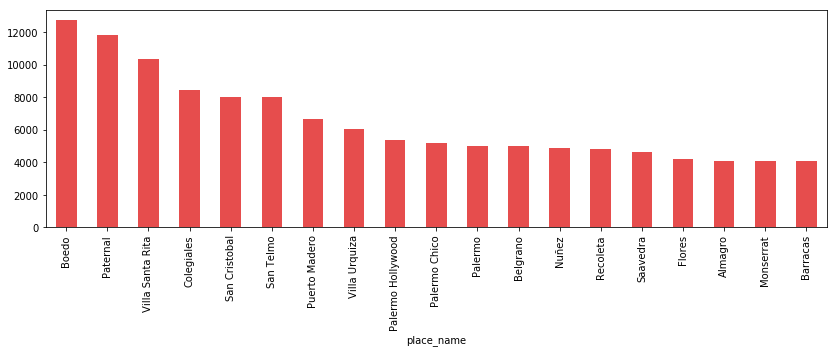

In [47]:
dataCF['barrio']= dataCF.place_name.str.upper().copy()
#Barrios de mayor precio por metro cuadrado en Capital Federal
preciom2=dataCF.groupby('place_name').mean()['price_per_m2'].sort_values(ascending=False)[0:19].copy()
preciom2.plot(kind='bar',figsize=(14,4),color=(0.9,0.3,0.3))

In [50]:
# Datos para plotear el mapa con Geopandas
barrios_csv = pd.read_csv('/home/matias/Escritorio/Geopandas/barrios.csv')
barrios_csv1 = barrios_csv[['WKT']]
# Shapefile
barrios = gpd.read_file('/home/matias/Escritorio/Enviroment/barrios_badata.shp') 
barrios_pd = pd.concat([barrios, barrios_csv1], axis=1)
barrios_pd.sort_values(by='BARRIO', ascending=True)
barrios_total = barrios_pd.merge(dataCF, left_on='BARRIO',right_on='barrio', how='left')
barrios_total['price_per_m2']= np.where(barrios_total['price_per_m2'].isnull(),0,barrios_total['price_per_m2'])
barrios_total['precio_propiedad']= np.where(barrios_total['precio_propiedad'].isnull(),0,barrios_total['precio_propiedad'])
barrios_total.head()

,BARRIO,COMUNA,PERIMETRO,AREA,geometry,WKT,state_name,place_name,surface_covered_in_m2,price_per_m2,lat,lon,precio_propiedad,barrio
0,CHACARITA,15.0,7725.695228,3.118101e+06,"POLYGON ((100961.3380000005 103691.9736000001,...","POLYGON ((-58.4528200492791 -34.5959886570639,...",Capital Federal,Chacarita,57.0,2017.543860,-34.583245,-58.455779,115000.0,CHACARITA
1,CHACARITA,15.0,7725.695228,3.118101e+06,"POLYGON ((100961.3380000005 103691.9736000001,...","POLYGON ((-58.4528200492791 -34.5959886570639,...",Capital Federal,Chacarita,35.0,2428.571429,-34.572512,-58.394726,85000.0,CHACARITA
2,CHACARITA,15.0,7725.695228,3.118101e+06,"POLYGON ((100961.3380000005 103691.9736000001,...","POLYGON ((-58.4528200492791 -34.5959886570639,...",Capital Federal,Chacarita,54.0,2961.111111,-34.591538,-58.447410,159900.0,CHACARITA
3,CHACARITA,15.0,7725.695228,3.118101e+06,"POLYGON ((100961.3380000005 103691.9736000001,...","POLYGON ((-58.4528200492791 -34.5959886570639,...",Capital Federal,Chacarita,31.0,2580.645161,-34.585998,-58.454436,80000.0,CHACARITA
4,CHACARITA,15.0,7725.695228,3.118101e+06,"POLYGON ((100961.3380000005 103691.9736000001,...","POLYGON ((-58.4528200492791 -34.5959886570639,...",Capital Federal,Chacarita,33.0,2424.242424,-34.572512,-58.394726,80000.0,CHACARITA


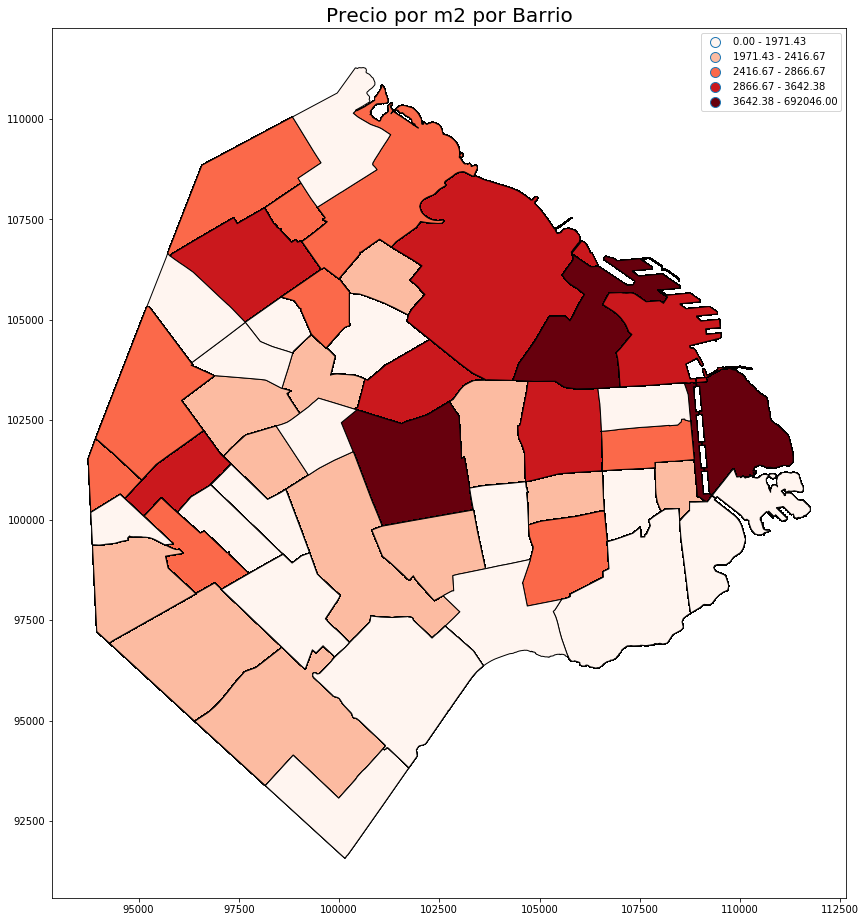

In [49]:
barrios_total.groupby('place_name').mean()['price_per_m2'].sort_values(ascending=False)
figsize=(10,10)
ax = barrios_total.plot(legend=True, column='price_per_m2', cmap='Reds', scheme="Quantiles", figsize= (18,16),edgecolor='black')
plt.title('Precio por m2 por Barrio', fontsize = 20)

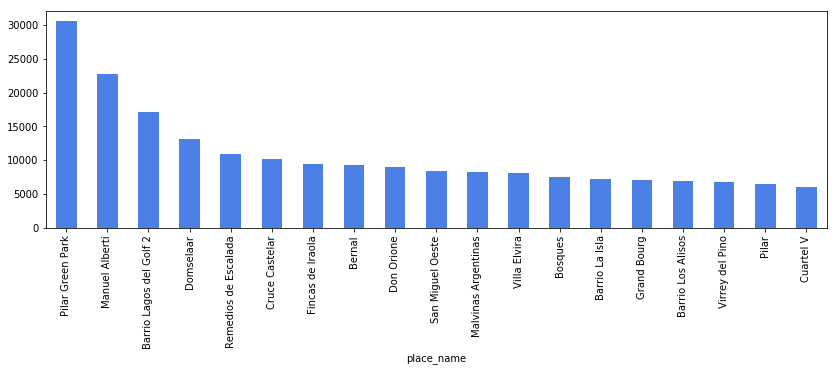

In [51]:
#Barrios de mayor precio por metro cuadrado en Gran Buenos Aires
dataGBA.groupby('place_name').mean()['price_per_m2'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4),color=(0.3,0.5,0.9));

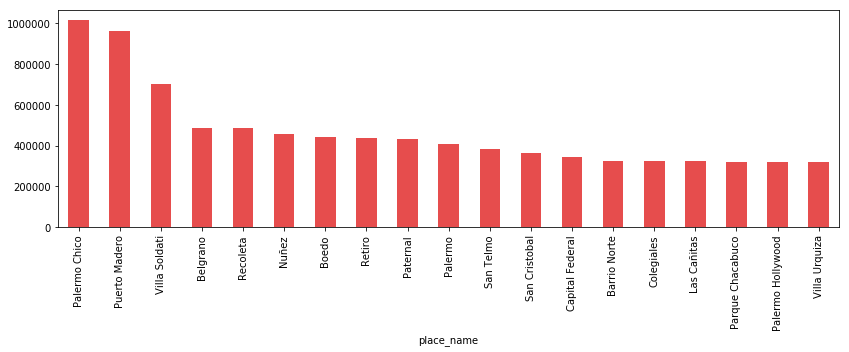

In [52]:
#Barrios de mayor precio de propiedad en Capital Federal
dataCF.groupby('place_name').mean()['precio_propiedad'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4),color=(0.9,0.3,0.3));

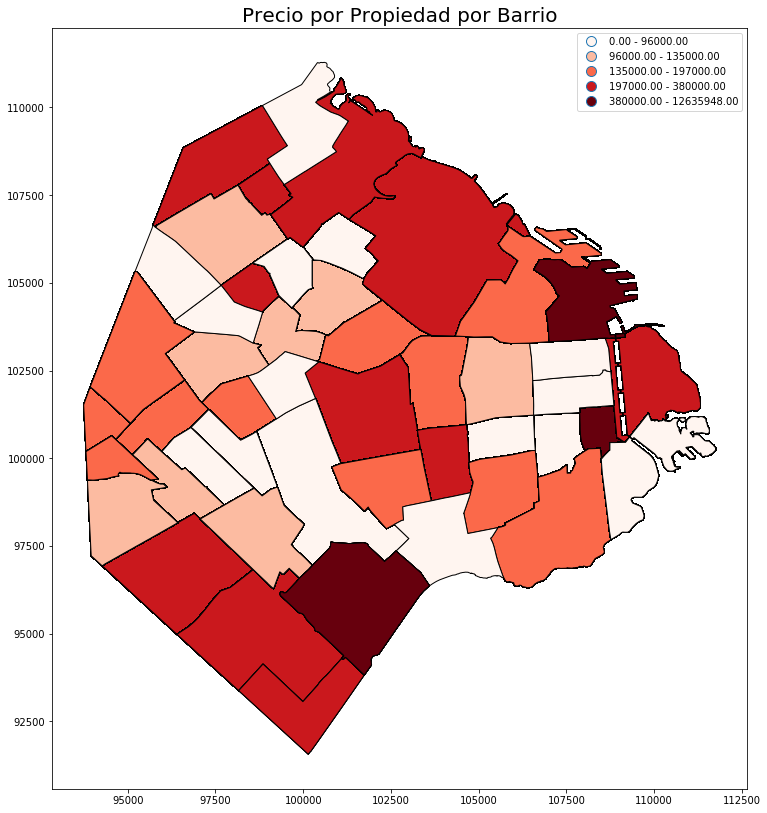

In [53]:
# plot the shapefile using plot()
figsize=(16,14)
ax = barrios_total.plot(legend=True, column='precio_propiedad', cmap='Reds', scheme="Quantiles", figsize= (figsize),edgecolor='black')
plt.title('Precio por Propiedad por Barrio', fontsize = 20)

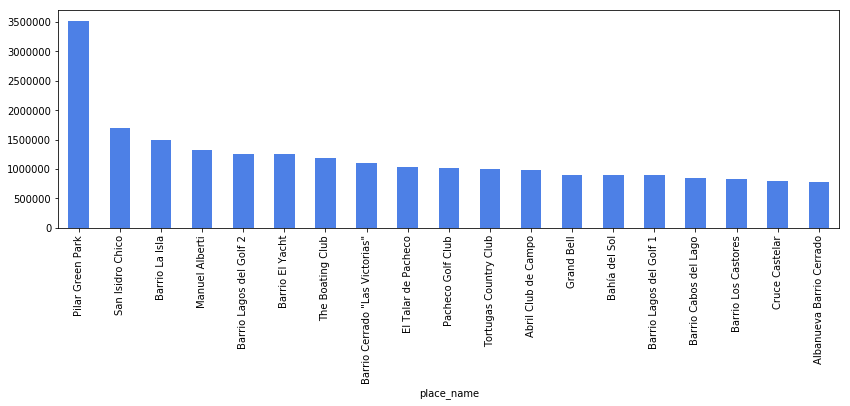

In [54]:
#Barrios de mayor precio de propiedad en Gran Buenos Aires
dataGBA.groupby('place_name').mean()['precio_propiedad'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4),color=(0.3,0.5,0.9));

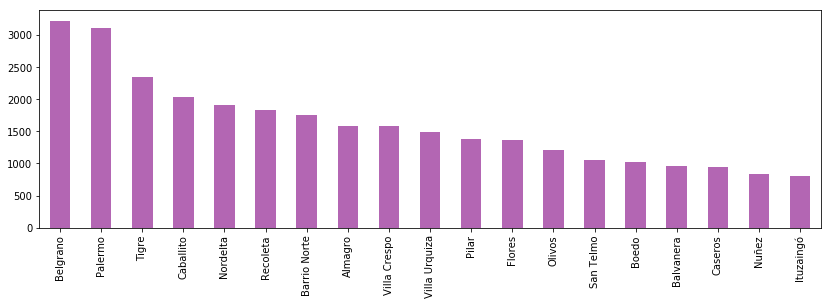

In [55]:
#Barrios con mayor numero de propiedades (GBA y CF)

dataCFGBA['place_name'].value_counts()[0:19].plot(kind='bar',figsize=(14,4), color=(0.7,0.4,0.7));

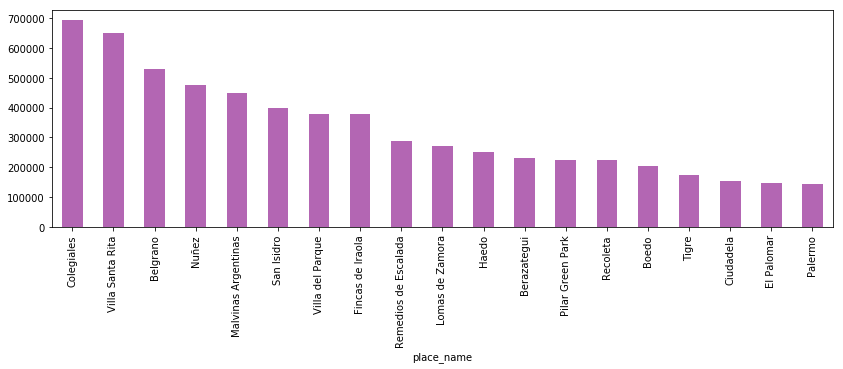

In [56]:
#Propiedades con mayor precio por metro cuadrado por barrio
dataCFGBA.groupby(['place_name'], sort=False)['price_per_m2'].max().sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4), color=(0.7,0.4,0.7));

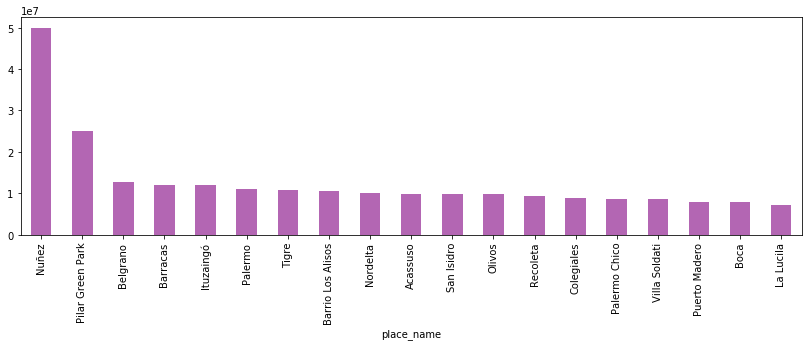

In [57]:
#Propiedades más caras por barrio

dataCFGBA.groupby(['place_name'], sort=False)['precio_propiedad'].max().sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4), color=(0.7,0.4,0.7));

In [58]:
#Top 10 propiedades más caras
dataCFGBA.sort_values(['precio_propiedad'], ascending=False).head(10)

,state_name,place_name,surface_covered_in_m2,price_per_m2,lat,lon,precio_propiedad
466909,Capital Federal,Nuñez,105.0,476190.476190,-34.548221,-58.455716,5.000000e+07
466910,Capital Federal,Nuñez,105.0,476190.476190,-34.548221,-58.455716,5.000000e+07
368761,Bs.As. G.B.A. Zona Norte,Pilar Green Park,111.0,225225.225225,-34.455906,-58.908329,2.500000e+07
480994,Capital Federal,Belgrano,138.0,91564.840580,-34.569867,-58.457581,1.263595e+07
423346,Capital Federal,Barracas,5000.0,2400.000000,-34.641421,-58.374063,1.200000e+07
491599,Bs.As. G.B.A. Zona Oeste,Ituzaingó,85.0,141176.470588,-34.657171,-58.682625,1.200000e+07
481042,Capital Federal,Belgrano,138.0,86550.869565,-34.569867,-58.457581,1.194402e+07
480958,Capital Federal,Belgrano,138.0,84857.289855,-34.569867,-58.457581,1.171031e+07
480989,Capital Federal,Belgrano,138.0,83185.992754,-34.569867,-58.457581,1.147967e+07
481002,Capital Federal,Belgrano,138.0,81559.260870,-34.569867,-58.457581,1.125518e+07


# 3 -Analisis de propiedades mas comunes
- 3.1 - Distribucion por tipo de propiedad

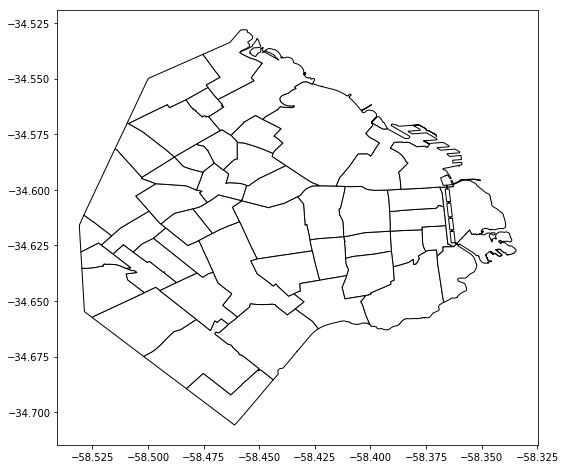

In [68]:
#Cargamos los Shapefile para geopandas y ploteamos un mapa de Capital Federal con sus limites
barrios_csv = pd.read_csv('data/shape/barrios.csv')
barrios_csv1 = barrios_csv[['WKT']]

barrios = gpd.read_file('data/shape/barrios_badata.shp') 

barrios_pd = pd.concat([barrios, barrios_csv1], axis=1)
barrios_pd.sort_values(by='BARRIO', ascending=True)
mapa_base = barrios_pd.to_crs(epsg=4326)
mapa_base.plot(color='white', edgecolor='black',figsize= (12,8))


In [99]:
#Data de properati
df = pd.read_csv('datos_procesados.csv')

#Filtramos solo las propiedades de Capital Federal
propCF = df[df['state_name']== 'Capital Federal']

propDepto = propCF#[propCF['property_type'] == 'apartment']

propCapital = propDepto[['property_type','place_name','rooms','lat','lon','price']]
propCapital = propCapital[propCapital['lon']>-61]
propCapital = propCapital[propCapital['lat']<-34.25]
propCapital = propCapital[propCapital['price']<500000]

propCapital.dropna(inplace = True)
propCapital.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21273 entries, 360720 to 493583
Data columns (total 6 columns):
property_type    21273 non-null object
place_name       21273 non-null object
rooms            21273 non-null float64
lat              21273 non-null float64
lon              21273 non-null float64
price            21273 non-null float64
dtypes: float64(4), object(2)
memory usage: 1.1+ MB


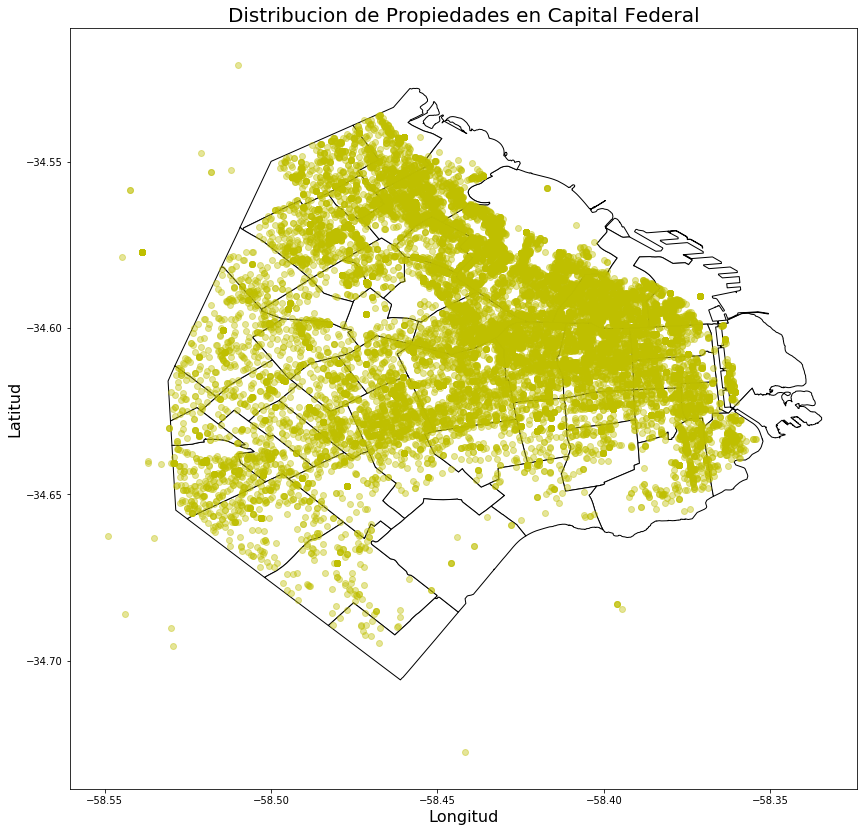

In [100]:
#Visualizamos todas als propiedades dentro del mapa de capital federal
mapa_base.plot(color='white', edgecolor='black',figsize= (18,14))

plt.scatter(x=propCapital["lon"], y=propCapital["lat"], alpha=0.4, c='y')

plt.title('Distribucion de Propiedades en Capital Federal', fontsize= 20)
plt.ylabel("Latitud", fontsize=16)
plt.xlabel("Longitud", fontsize=16)
plt.show()

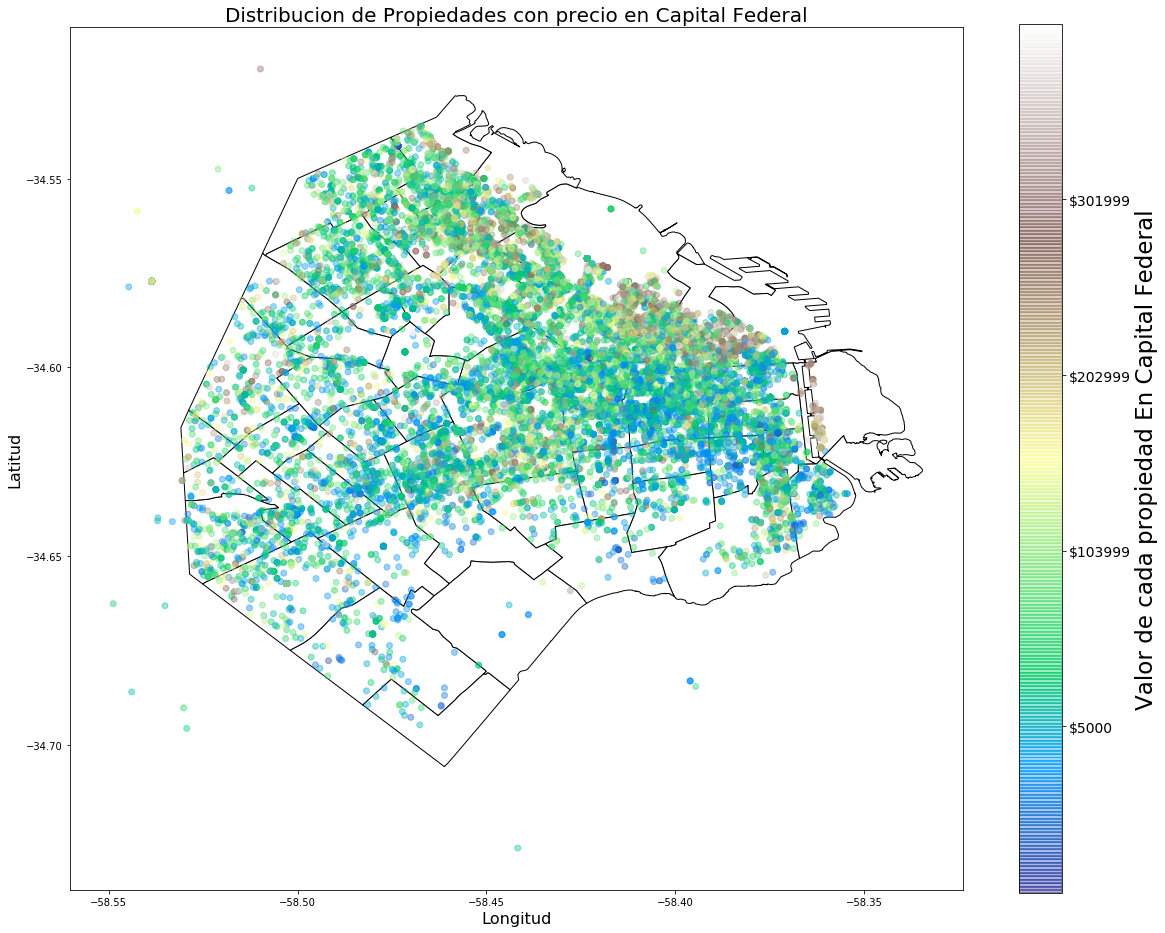

In [101]:
mapa_base.plot(color='white', edgecolor='black',figsize= (20,16))

plt.scatter(x=propCapital["lon"], y=propCapital["lat"], alpha=0.4,c =propCapital["price"],cmap='terrain')

plt.ylabel("Latitud", fontsize=16)
plt.xlabel("Longitud", fontsize=16)


mx = max(propCapital['price'])
mn = min(propCapital['price'])
md = (mx)/2

tick_values = np.linspace(mn, mx,6)
cbar = plt.colorbar()
cbar.set_cmap("terrain")
cbar.solids.set_edgecolor("face")
cbar.solids.set_cmap("terrain")
cbar.ax.set_yticklabels(["$%d"%(v) for v in tick_values], fontsize=14)
cbar.set_label('Valor de cada propiedad En Capital Federal', fontsize=23)

plt.title('Distribucion de Propiedades con precio en Capital Federal', fontsize= 20)

plt.show()



In [102]:
#Por cada tipo de propiedad asignamos un color
propCapital['code_prop'] = 'turquoise'
propCapital['code_prop'] = np.where(propCapital['property_type']=='house', 'orange', propCapital['code_prop'])
propCapital['code_prop'] = np.where(propCapital['property_type']=='PH', 'crimson', propCapital['code_prop'])
propCapital['code_prop'] = np.where(propCapital['property_type']=='store','darkorchid', propCapital['code_prop'])
propCapital.head()
        

,property_type,place_name,rooms,lat,lon,price,code_prop
360720,apartment,Palermo,1.0,-34.574594,-58.419255,71000.0,turquoise
360734,apartment,Villa del Parque,2.0,-34.610611,-58.479590,96000.0,turquoise
360735,apartment,Villa del Parque,2.0,-34.610611,-58.479590,86000.0,turquoise
360742,apartment,Barracas,1.0,-34.639086,-58.369347,165000.0,turquoise
360789,apartment,Flores,3.0,-34.626397,-58.468476,92500.0,turquoise


In [103]:
tipoDePropiedades = propCapital.groupby('property_type').agg([np.size])
tipoDePropiedades.head()

,place_name,rooms,lat,lon,price,code_prop
,size,size,size,size,size,size
property_type,,,,,,
PH,1766,1766.0,1766.0,1766.0,1766.0,1766
apartment,18835,18835.0,18835.0,18835.0,18835.0,18835
house,585,585.0,585.0,585.0,585.0,585
store,87,87.0,87.0,87.0,87.0,87


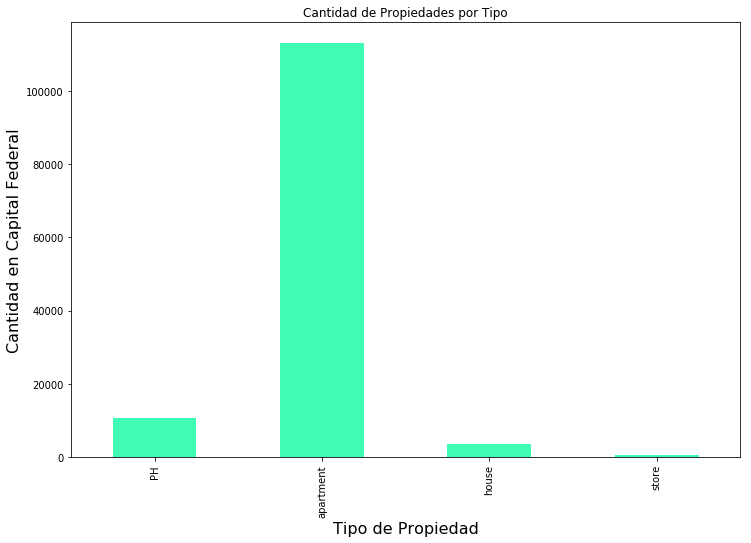

In [104]:
f = plt.figure()

plt.title ('Cantidad de Propiedades por Tipo',color='black')

ax = tipoDePropiedades.plot(kind='bar', stacked=True, figsize=(12,8) ,alpha=0.75,ax=f.gca(), color='mediumspringgreen')

plt.legend().remove()

ax.set_ylabel('Cantidad en Capital Federal', fontsize= 16)
ax.set_xlabel('Tipo de Propiedad', fontsize= 16)
plt.show()


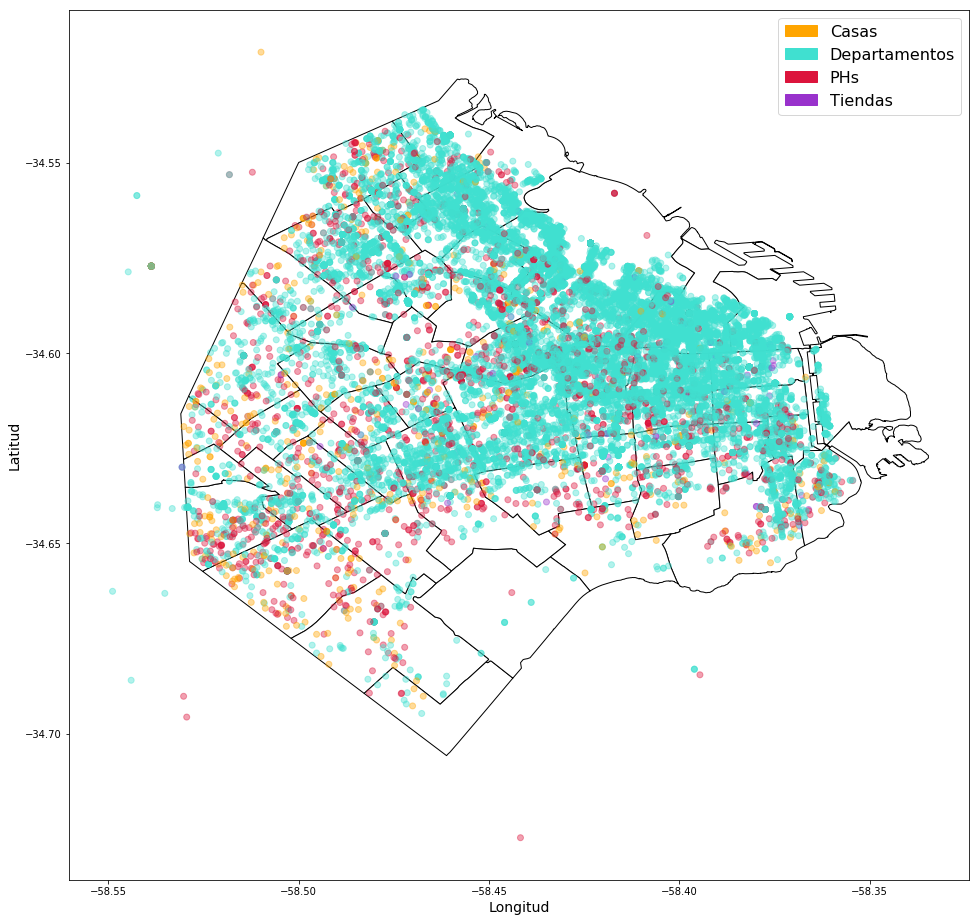

In [105]:
import matplotlib.patches as mpatches

mapa_base.plot(color='white', edgecolor='black',figsize= (20,16))

plt.scatter(x=propCapital["lon"], y=propCapital["lat"], alpha=0.4,c =propCapital['code_prop'])

plt.ylabel("Latitud", fontsize=14)
plt.xlabel("Longitud", fontsize=14)



red_patch = mpatches.Patch(color='orange', label='Casas')
blue_patch = mpatches.Patch(color='turquoise', label='Departamentos')

green_patch = mpatches.Patch(color='crimson', label='PHs')

yellow_patch = mpatches.Patch(color='darkorchid', label='Tiendas')

plt.legend(handles=[red_patch,blue_patch,green_patch,yellow_patch],fontsize=16)
plt.show()

Por mucho el tipo de propiedad dominante son los departamentos en Capital Federal, ahora cuantos ambientes tiene el departamento promedio de capital federal

In [106]:
apartamentos = propCapital[propCapital['property_type'] == 'apartment']
apartamentos = propCapital[propCapital['rooms'] <7]
apartamentosPorAmbiente = apartamentos.groupby('rooms').agg([np.size])
apartamentosPorAmbiente.head()

,property_type,place_name,lat,lon,price,code_prop
,size,size,size,size,size,size
rooms,,,,,,
1.0,4894,4894,4894.0,4894.0,4894.0,4894
2.0,5846,5846,5846.0,5846.0,5846.0,5846
3.0,5599,5599,5599.0,5599.0,5599.0,5599
4.0,3504,3504,3504.0,3504.0,3504.0,3504
5.0,968,968,968.0,968.0,968.0,968


In [107]:
propCapital['code_rooms'] = 'turquoise'
propCapital['code_rooms'] = np.where(propCapital['rooms']==1, 'lightcoral', propCapital['code_rooms'])
propCapital['code_rooms'] = np.where(propCapital['rooms']==2, 'lightgreen', propCapital['code_rooms'])
propCapital['code_rooms'] = np.where(propCapital['rooms']==3,'royalblue', propCapital['code_rooms'])
propCapital['code_rooms'] = np.where(propCapital['rooms']==4, 'dimgray', propCapital['code_rooms'])
propCapital['code_rooms'] = np.where(propCapital['rooms']==5, 'khaki', propCapital['code_rooms'])
propCapital['code_rooms'] = np.where(propCapital['rooms']==6,'yellow', propCapital['code_rooms'])

propCapital.head()

,property_type,place_name,rooms,lat,lon,price,code_prop,code_rooms
360720,apartment,Palermo,1.0,-34.574594,-58.419255,71000.0,turquoise,lightcoral
360734,apartment,Villa del Parque,2.0,-34.610611,-58.479590,96000.0,turquoise,lightgreen
360735,apartment,Villa del Parque,2.0,-34.610611,-58.479590,86000.0,turquoise,lightgreen
360742,apartment,Barracas,1.0,-34.639086,-58.369347,165000.0,turquoise,lightcoral
360789,apartment,Flores,3.0,-34.626397,-58.468476,92500.0,turquoise,royalblue


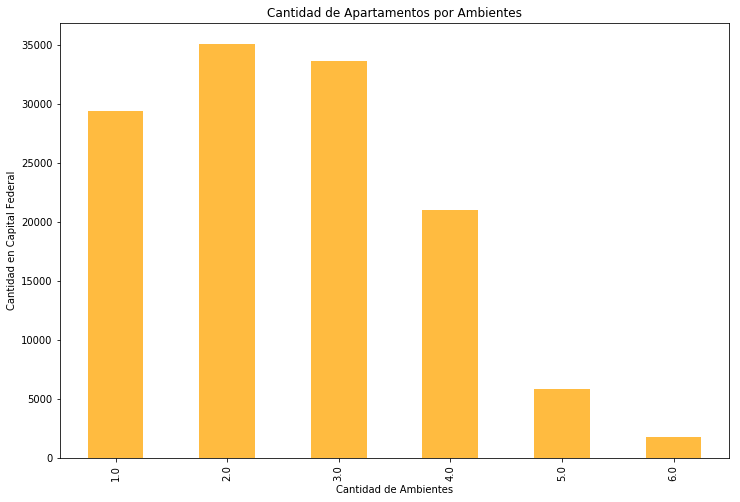

In [108]:
f = plt.figure()

plt.title ('Cantidad de Apartamentos por Ambientes',color='black')

ax = apartamentosPorAmbiente.plot(kind='bar', stacked=True, figsize=(12,8) ,alpha=0.75,ax=f.gca(), color='orange')

plt.legend().remove()

ax.set_ylabel('Cantidad en Capital Federal')
ax.set_xlabel('Cantidad de Ambientes')
plt.show()


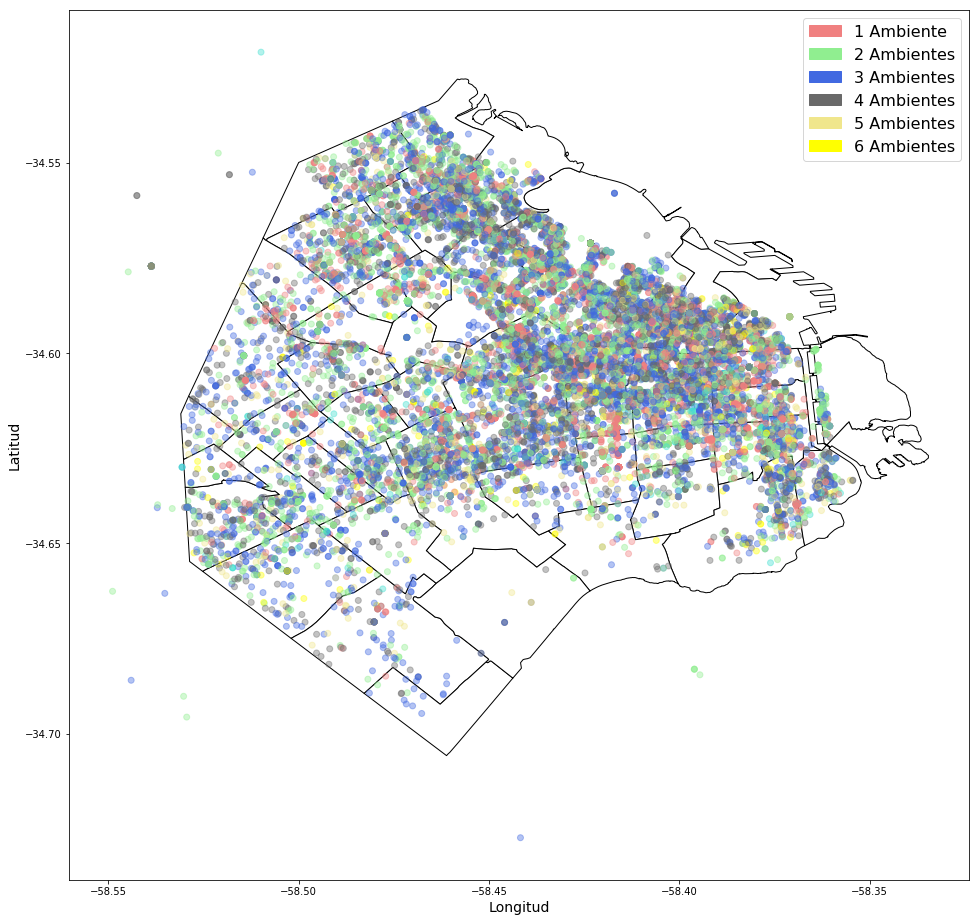

In [109]:
mapa_base.plot(color='white', edgecolor='black',figsize= (20,16))

plt.scatter(x=propCapital["lon"], y=propCapital["lat"], alpha=0.4,c =propCapital['code_rooms'])

plt.ylabel("Latitud", fontsize=14)
plt.xlabel("Longitud", fontsize=14)

lightcoral_patch = mpatches.Patch(color='lightcoral', label='1 Ambiente')
lightgreen_patch = mpatches.Patch(color='lightgreen', label='2 Ambientes')
royalblue_patch = mpatches.Patch(color='royalblue', label='3 Ambientes')
dimgray_patch = mpatches.Patch(color='dimgray', label='4 Ambientes')
khaki_patch = mpatches.Patch(color='khaki', label='5 Ambientes')
yellow_patch = mpatches.Patch(color='yellow', label='6 Ambientes')


plt.legend(handles=[lightcoral_patch,lightgreen_patch,royalblue_patch,dimgray_patch,khaki_patch,yellow_patch],fontsize=16)
plt.show()

In [110]:
#Data de properati
df = pd.read_csv('datos_procesados.csv')
buenosAires = df[df.state_name.str.contains('Buenos Aires',na=False)]
bsAs= df[df.state_name.str.contains('G.B.A.', na=False)]
propBuenosAires = pd.concat([buenosAires, bsAs])
propBuenosAires = propBuenosAires[['property_type','place_name','rooms','lat','lon','price']]
propBuenosAires.dropna(inplace = True)
propBuenosAires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28147 entries, 360730 to 493554
Data columns (total 6 columns):
property_type    28147 non-null object
place_name       28147 non-null object
rooms            28147 non-null float64
lat              28147 non-null float64
lon              28147 non-null float64
price            28147 non-null float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


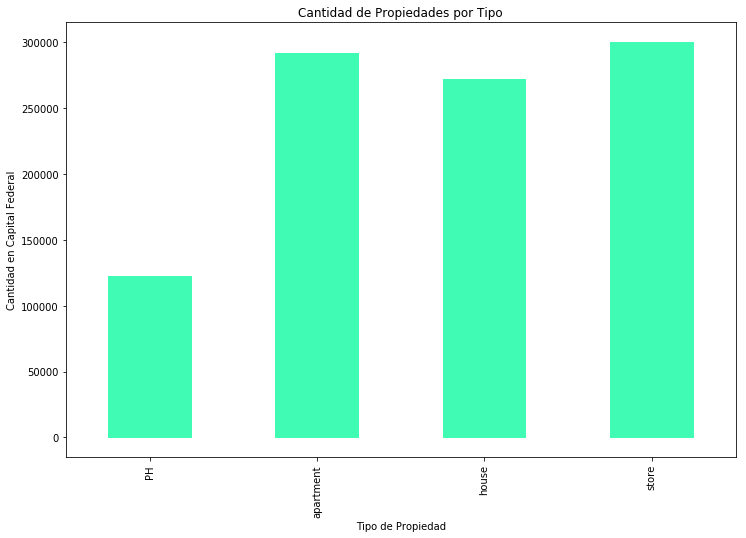

In [111]:
ptBuenosAires = propBuenosAires.groupby('property_type').agg([np.mean])
f = plt.figure()

plt.title ('Cantidad de Propiedades por Tipo',color='black')

ax = ptBuenosAires.plot(kind='bar', stacked=True, figsize=(12,8) ,alpha=0.75,ax=f.gca(), color='mediumspringgreen')

plt.legend().remove()

ax.set_ylabel('Cantidad en Capital Federal')
ax.set_xlabel('Tipo de Propiedad')
plt.show()

In [ ]:
Por el nivel de urbanizacion menor en provincia de Buenos Aires predominan las casas sobre los departamentos

## 4 - Análisis geográfico
- 4.1 - Variación del precio respecto a cercanía al Obelisco

¿La cercanía al centro afecta los precios?

In [ ]:
data = properties.copy()

#Filtro los datos que me interesan (estado, barrio, superficie, precio, y ubicacion)
data2 = data[['state_name','surface_covered_in_m2','price_per_m2','lat','lon']].copy()

#Limpio los Na
data2.dropna(inplace = True)

#Agrego una columna con el precio de la propiedad (superficie*precio por m2)
data2['precio_propiedad'] = data2['surface_covered_in_m2']*data2['price_per_m2']

#Separo los datos de Capital Federal
dataCF = data2[data2['state_name']== 'Capital Federal']

In [19]:
#Coordenadas del obelisco: 34°36′11″S 58°22′54″O / -34.603075, -58.381653
obelisco_lon=-58.381653
obelisco_lat=-34.603075

#le agrego a los datos de Capital Federal una columna con la distancia al centro (tomo el obelisco como referencia)
dataCF['dist_centro'] = np.absolute(dataCF['lon'] - obelisco_lon)+ np.absolute(dataCF['lat'] - obelisco_lat).copy()

/home/matias/anaconda2/envs/geoenv/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


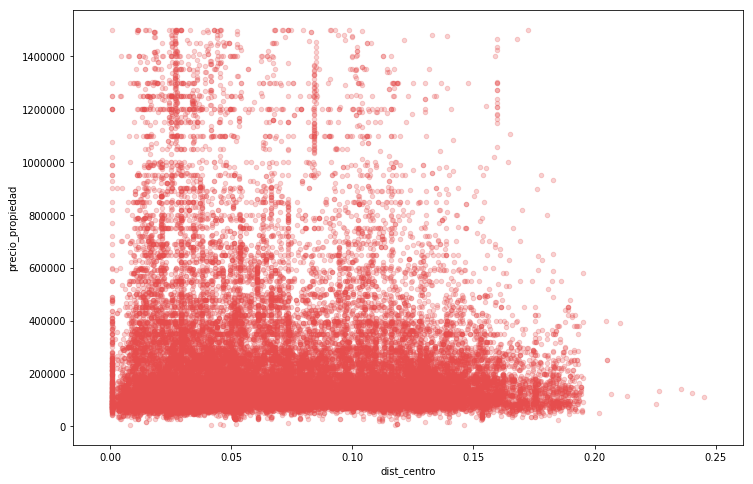

In [21]:
#Armo scatter plot con relación entre la distancia al obelisco y el precio
dataCF1 = dataCF[dataCF['precio_propiedad']< 1500000]
dataCF2 = dataCF1[dataCF1['dist_centro']< 0.4]
dataCF2.plot.scatter('dist_centro', 'precio_propiedad',alpha=0.25, figsize=(12,8), color=(0.9,0.3,0.3))

# 6 - Análisis de puntos de interés
## 6.1 - Lineas de subte

## Linea A
Hipotesis: 
La cercania a las estaciones de la linea A influye en el precio de las propiedades, para esto tomaremos los barrios que son recorridos por la linea A y veremos si la distancia a las paradas de est influye en el precio de las propiedades.
Primer aproach, tomamos cada barrio vemos cuales son las distnacia de sus propiedades a las paradas y tomamos la menor luego realizamos un scatter plot con estos datos y vemos si la distribucion del precio influye en esta

subte A: inicia entre los barrios (Monserrat y San nicolas) , luego balvanera, Almagro y caballito

In [ ]:
#Data de properati
df = properties.copy()

#Filtramos solo las propiedades de Capital Federal
propCF = df[df['state_name']== 'Capital Federal'].copy()

propCFf = propCF[['property_type','place_name','rooms','lat','lon','price']].copy()

propRecorridoA= propCFf[propCFf.place_name.str.contains('Monserrat') |
                        propCFf.place_name.str.contains('San Nicolas')| #No hay datos de San Nicolas
                        propCFf.place_name.str.contains('Balvanera')|
                        propCFf.place_name.str.contains('Almagro')|
                        propCFf.place_name.str.contains('Flores')|
                        propCFf.place_name.str.contains('Caballito')].copy()

propRecorridoA.dropna(inplace = True)
propRecorridoA.info()

In [ ]:
df = pd.read_csv('/home/matias/Escritorio/notebook/estaciones-de-subte.csv')
df.head()

estacionesA = df[df['LINEA'] == 'A'].copy()
estacionesA.head(20)

In [ ]:
i = 1
for index, row in estacionesA.iterrows():
    lon = estacionesA.loc[index,'X']
    lat = estacionesA.loc[index,'Y']
    label = str(i)
    propRecorridoA['lon' + label] = lon
    propRecorridoA['lat' + label] = lat
    i = i+1
    


In [ ]:
propRecorridoC.info()

In [ ]:
import math

def haversine(lat1, lon1, lat2, lon2):
    rad=math.pi/180
    dlat=lat2-lat1
    dlon=lon2-lon1
    R=6372.795477598
    a=(np.sin(rad*dlat/2))**2 + np.cos(rad*lat1)*np.cos(rad*lat2)*(np.sin(rad*dlon/2))**2
    distancia=2*R*np.arcsin(np.sqrt(a))
    distM = distancia*1000
    return distM

In [ ]:
for row in estacionesA.iterrows():
    for i in range(1,10):
        label = str(i)
        lat1 = propRecorridoA['lat'].astype(float)
        lon1 = propRecorridoA['lon'].astype(float)
        lat2 = propRecorridoA['lat'+ label].astype(float)
        lon2 = propRecorridoA['lon'+ label].astype(float)
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoA['dist' + label] = dist
        

In [ ]:
propRecorridoA.head()

In [ ]:
propRecorridoA['min_dist'] =propRecorridoA.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6',
                                                  'dist7','dist8','dist9']].min(axis=1)
propRecorridoA.head()


In [ ]:
%matplotlib inline
propRecorridoA1 = propRecorridoC[propRecorridoA['price']< 200000].copy()
#propRecorridoC2 = propRecorridoC1[propRecorridoC['min_dist']< 0.03]
propRecorridoA1.plot.scatter('min_dist', 'price',alpha=0.25, figsize=(12,8), color = 'Blue')

# Linea B
Hipotesis: 
La cercania a las estaciones de la linea B influye en el precio de las propiedades, para esto tomaremos los barrios que son recorridos por la linea b y veremos si la distancia a las paradas de est influye en el precio de las propiedades.
Primer aproach, tomamos cada barrio vemos cuales son las distnacia de sus propiedades a las paradas y tomamos la menor luego realizamos un scatter plot con estos datos y vemos si la distribucion del precio influye en esta

subte B: San nicolas, Balvanera, Almagro, Villa crespo, Chacarita

subte A: inicia entre los barrios (Monserrat y San nicolas) , luego balvanera, Almagro y caballito

subte B: San nicolas, Balvanera, Almagro, Villa crespo, Chacarita

subte C: Retiro, San nicolas, Monserrat, Constitucion

subte D: Monserrat, SAn nicolas, Balvanera, Recoleta, Palermo, Belgrano

subate E: Monserrat, Constitucion, San cristobal, boedo, Parque chacabuco, Parque avellaneda.

subte H: Balvanera

In [ ]:
#Data de properati
df = properties.copy()

#Filtramos solo las propiedades de Capital Federal
propCF = df[df['state_name']== 'Capital Federal'].copy()

propCFf = propCF[['property_type','place_name','rooms','lat','lon','price']].copy()

propRecorridoB= propCFf[propCFf.place_name.str.contains('San Nicolas') |
                        propCFf.place_name.str.contains('Balvanera')|
                        propCFf.place_name.str.contains('Almagro')|
                        propCFf.place_name.str.contains('Villa Crespo')|
                        propCFf.place_name.str.contains('Chacarita')].copy()

propRecorridoB.dropna(inplace = True)
propRecorridoB.info()

In [ ]:
df = pd.read_csv('/home/matias/Escritorio/notebook/estaciones-de-subte.csv')
df.head()

estacionesB = df[df['LINEA'] == 'B']
estacionesB.head(20)

In [ ]:
i = 1
for index, row in estacionesb.iterrows():
    lon = estacionesB.loc[index,'X']
    lat = estacionesB.loc[index,'Y']
    label = str(i)
    propRecorridoB['lon' + label] = lon
    propRecorridoB['lat' + label] = lat
    i = i+1
    


In [ ]:
propRecorridoB.info()

In [ ]:

for row in estacionesB.iterrows():
    for i in range(1,10):
        label = str(i)
        lat1 = propRecorridoB['lat'].astype(float)
        lon1 = propRecorridoB['lon'].astype(float)
        lat2 = propRecorridoB['lat'+ label].astype(float)
        lon2 = propRecorridoB['lon'+ label].astype(float)
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoB['dist' + label] = dist
        
    

In [ ]:
propRecorridoB.head()

In [ ]:
propRecorridoB['min_dist'] =propRecorridoB.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6',
                                                  'dist7','dist8','dist9']].min(axis=1)
propRecorridoB.head()

In [ ]:
%matplotlib inline
propRecorridoB1 = propRecorridoB[propRecorridoB['price']< 200000].copy()
propRecorridoB1.plot.scatter('min_dist', 'price',alpha=0.25, figsize=(12,8), color = 'Red')

# Linea C

Hipotesis: La cercania a las estaciones de la linea C influye en el precio de las propiedades, para esto tomaremos los barrios que son recorridos por la linea C y veremos si la distancia a las paradas de est influye en el precio de las propiedades. Primer aproach, tomamos cada barrio vemos cuales son las distnacia de sus propiedades a las paradas y tomamos la menor luego realizamos un scatter plot con estos datos y vemos si la distribucion del precio influye en esta


subte C: Retiro, San nicolas, Monserrat, Constitucion

In [1]:
import datetime as datetime
#Data de properati
df = properties.copy()

#Filtramos solo las propiedades de Capital Federal
propCF = df[df['state_name']== 'Capital Federal']

propCFf = propCF[['property_type','place_name','rooms','lat','lon','price']]

propRecorridoC= propCFf[propCFf.place_name.str.contains('San Nicolas') |
                        propCFf.place_name.str.contains('Monserrat')|
                        propCFf.place_name.str.contains('Retiro')|
                        propCFf.place_name.str.contains('Constitucion')]

propRecorridoC.dropna(inplace = True)
propRecorridoC.info()

NameError: name 'properties' is not defined

In [ ]:
df = pd.read_csv('/home/matias/Escritorio/notebook/estaciones-de-subte.csv')
df.head()

estacionesC = df[df['LINEA'] == 'C']
estacionesC.head(20)

In [ ]:
i = 1
for index, row in estacionesC.iterrows():
    lon = estacionesC.loc[index,'X']
    lat = estacionesC.loc[index,'Y']
    label = str(i)
    propRecorridoC['lon' + label] = lon
    propRecorridoC['lat' + label] = lat
    i = i+1
    

In [ ]:
propRecorridoC.info()

In [ ]:
for row in estacionesC.iterrows():
    for i in range(1,10):
        label = str(i)
        lat1 = propRecorridoC['lat'].astype(float)
        lon1 = propRecorridoC['lon'].astype(float)
        lat2 = propRecorridoC['lat'+ label].astype(float)
        lon2 = propRecorridoC['lon'+ label].astype(float)
        #dist = np.absolute(propRecorridoC['lon'] - propRecorridoC['lon'+label]) + np.absolute(propRecorridoC['lat'] - propRecorridoC['lat'+label])
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoC['dist' + label] = dist
        
    

In [ ]:
propRecorridoC.head()

In [ ]:
propRecorridoC['min_dist'] =propRecorridoC.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6',
                                                  'dist7','dist8','dist9']].min(axis=1)
propRecorridoC.head()


%matplotlib inline
propRecorridoC1 = propRecorridoC[propRecorridoC['price']< 200000]
#propRecorridoC2 = propRecorridoC1[propRecorridoC['min_dist']< 0.03]
propRecorridoC1.plot.scatter('min_dist', 'price',alpha=0.25, figsize=(12,8), color= 'DarkBlue')



# Linea D
Hipotesis: La cercanía a las estaciones de la linea D influye en el precio de las propiedades, para esto tomaremos los barrios que son recorridos por la linea D y veremos si la distancia a las paradas de esta influye en el precio de las propiedades. Primer approach: tomamos cada barrio vemos cuales son las distancias de sus propiedades a las paradas, y tomamos la menor. Luego realizamos un scatter plot con estos datos y vemos si la distribucion del precio influye en ésta.
La línea D pasa por: Monserrat, San nicolas, Balvanera, Recoleta, Palermo, Belgrano

In [ ]:
df = pd.read_csv('/home/martin/Documents/jupyter/datos_procesados.csv')

#Filtramos solo las propiedades de Capital Federal
propDF = properties.copy()

propDFf = propDF[['property_type','place_name','rooms','lat','lon','price']]

propRecorridoD= propDFf[propDFf.place_name.str.contains('Monserrat') |
                        propDFf.place_name.str.contains('San Nicolas')|
                        propDFf.place_name.str.contains('Balvanera')|
                        propDFf.place_name.str.contains('Recoleta')|
                        propDFf.place_name.str.contains('Palermo')|
                        propDFf.place_name.str.contains('Belgrano')|
                        propDFf.place_name.str.contains('Barrio Norte')].copy()

propRecorridoD.dropna(inplace = True)
propRecorridoD.info()

In [ ]:
df = pd.read_csv('/home/martin/Documents/jupyter/estaciones-de-subte.csv', encoding = "ISO-8859-1")

estacionesD = df[df['LINEA'] == 'D']
estacionesD.head(20)

In [ ]:
i = 1
for index, row in estacionesD.iterrows():
    lon = estacionesD.loc[index,'X']
    lat = estacionesD.loc[index,'Y']
    label = str(i)
    propRecorridoD['lon' + label] = lon
    propRecorridoD['lat' + label] = lat
    i = i+1

In [ ]:
for row in estacionesD.iterrows():
    for i in range(1,17):
        label = str(i)
        lat1 = propRecorridoD['lat'].astype(float)
        lon1 = propRecorridoD['lon'].astype(float)
        lat2 = propRecorridoD['lat'+ label].astype(float)
        lon2 = propRecorridoD['lon'+ label].astype(float)
        #dist = np.absolute(propRecorridoE['lon'] - propRecorridoC['lon'+label]) + np.absolute(propRecorridoC['lat'] - propRecorridoC['lat'+label])
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoD['dist' + label] = dist

In [ ]:
propRecorridoD.head(5)

In [ ]:
propRecorridoD['min_dist'] =propRecorridoD.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6','dist7','dist8','dist9','dist10', 'dist11','dist12','dist13','dist14','dist15','dist16']].min(axis=1)
propRecorridoD.head()

%matplotlib inline
propRecorridoD1 = propRecorridoD[propRecorridoD['price']< 1500000]
propRecorridoD2 = propRecorridoD1[propRecorridoD1['min_dist']< 3500]
propRecorridoD2.plot.scatter('min_dist', 'price',alpha=0.25, figsize=(12,8), color=(0.1,0.6,0.1))

# Linea E

Hipotesis: 
La cercanía a las estaciones de la linea E influye en el precio de las propiedades, para esto tomaremos los barrios que son recorridos por la linea A y veremos si la distancia a las paradas de esta influye en el precio de las propiedades.
Primer approach: tomamos cada barrio vemos cuales son las distancias de sus propiedades a las paradas, y tomamos la menor. Luego realizamos un scatter plot con estos datos y vemos si la distribucion del precio influye en ésta.

La línea E pasa por: Monserrat, Constitucion, San cristobal, boedo, Parque chacabuco, Parque avellaneda.

In [ ]:
df = properties.copy()

#Filtramos solo las propiedades de Capital Federal
propCF = df[df['state_name']== 'Capital Federal'].copy()

propCFf = propCF[['property_type','place_name','rooms','lat','lon','price']].copy()

propRecorridoE= propCFf[propCFf.place_name.str.contains('Monserrat') |
                        propCFf.place_name.str.contains('Constitucion')| #No hay datos de San Nicolas
                        propCFf.place_name.str.contains('San Cristobal')|
                        propCFf.place_name.str.contains('Boedo')|
                        propCFf.place_name.str.contains('Parque Chacabuco')|
                        propCFf.place_name.str.contains('Parque Avellaneda')].copy()

propRecorridoE.dropna(inplace = True)
propRecorridoE.info()

In [ ]:
df = pd.read_csv('/home/martin/Documents/jupyter/estaciones-de-subte.csv', encoding = "ISO-8859-1")

estacionesE = df[df['LINEA'] == 'E']
estacionesE.head(20)

In [ ]:
i = 1
for index, row in estacionesE.iterrows():
    lon = estacionesE.loc[index,'X']
    lat = estacionesE.loc[index,'Y']
    label = str(i)
    propRecorridoE['lon' + label] = lon
    propRecorridoE['lat' + label] = lat
    i = i+1


In [ ]:
for row in estacionesE.iterrows():
    for i in range(1,16):
        label = str(i)
        lat1 = propRecorridoE['lat'].astype(float)
        lon1 = propRecorridoE['lon'].astype(float)
        lat2 = propRecorridoE['lat'+ label].astype(float)
        lon2 = propRecorridoE['lon'+ label].astype(float)
        #dist = np.absolute(propRecorridoE['lon'] - propRecorridoC['lon'+label]) + np.absolute(propRecorridoC['lat'] - propRecorridoC['lat'+label])
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoE['dist' + label] = dist

In [ ]:
propRecorridoE.head(5)

In [ ]:
propRecorridoE['min_dist'] =propRecorridoE.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6','dist7','dist8','dist9','dist10', 'dist11','dist12','dist13','dist14','dist15']].min(axis=1)
propRecorridoE.head()

In [ ]:
%matplotlib inline
propRecorridoE1 = propRecorridoE[propRecorridoE['price']< 1000000]
propRecorridoE2 = propRecorridoE1[propRecorridoE1['min_dist']< 4000]
propRecorridoE2.plot.scatter('min_dist', 'price',alpha=0.25, figsize=(12,8), color=(0.6,0.3,0.7))

# Linea H
Hipotesis: La cercanía a las estaciones de la linea H influye en el precio de las propiedades, para esto tomaremos los barrios que son recorridos por la linea A y veremos si la distancia a las paradas de esta influye en el precio de las propiedades. Primer approach: tomamos cada barrio vemos cuales son las distancias de sus propiedades a las paradas, y tomamos la menor. Luego realizamos un scatter plot con estos datos y vemos si la distribucion del precio influye en ésta.
La línea H pasa por: Parque Patricios, San Cristóbal, Balvanera, Boedo, Almagro, y Recoleta

In [ ]:
df = properties.copy()

#Filtramos solo las propiedades de Capital Federal
propHF = df[df['state_name']== 'Capital Federal'].copy()

propHFf = propHF[['property_type','place_name','rooms','lat','lon','price']].copy()

propRecorridoH= propHFf[propHFf.place_name.str.contains('Parque Patricios') |
                        propHFf.place_name.str.contains('Balvanera')|
                        propHFf.place_name.str.contains('San Cristobal')|
                        propHFf.place_name.str.contains('Boedo')|
                        propHFf.place_name.str.contains('Almagro')|
                        propHFf.place_name.str.contains('Recoleta')].copy()

propRecorridoH.dropna(inplace = True)
propRecorridoH.info()

In [ ]:
df = pd.read_csv('/home/martin/Documents/jupyter/estaciones-de-subte.csv', encoding = "ISO-8859-1")

estacionesH = df[df['LINEA'] == 'H'].copy()
estacionesH.head(20)

In [ ]:

i = 1
for index, row in estacionesH.iterrows():
    lon = estacionesH.loc[index,'X']
    lat = estacionesH.loc[index,'Y']
    label = str(i)
    propRecorridoH['lon' + label] = lon
    propRecorridoH['lat' + label] = lat
    i = i+1

In [ ]:
for row in estacionesH.iterrows():
    for i in range(1,12):
        label = str(i)
        lat1 = propRecorridoH['lat'].astype(float)
        lon1 = propRecorridoH['lon'].astype(float)
        lat2 = propRecorridoH['lat'+ label].astype(float)
        lon2 = propRecorridoH['lon'+ label].astype(float)
        #dist = np.absolute(propRecorridoH['lon'] - propRecorridoC['lon'+label]) + np.absolute(propRecorridoC['lat'] - propRecorridoC['lat'+label])
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoH['dist' + label] = dist

In [ ]:
propRecorridoH.head(5)

In [ ]:
propRecorridoH['min_dist'] =propRecorridoH.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6','dist7','dist8','dist9','dist10', 'dist11']].min(axis=1)
propRecorridoH.head()

In [ ]:
%matplotlib inline
propRecorridoH1 = propRecorridoH[propRecorridoH['price']< 1000000]
propRecorridoH2 = propRecorridoH1[propRecorridoH1['min_dist']< 3000]
propRecorridoH2.plot.scatter('min_dist', 'price',alpha=0.25, figsize=(12,8), color=(0.9,0.9,0.0))

In [ ]:
#Defino una funcion que calcula la distancia entre dos puntos
import math
def dist(lat1,lon1,lat2,lon2):
    dLat = math.radians(lat2-lat1)
    dLon = math.radians(lon2-lon1)

    lat1 = math.radians(lat1)
    lat2 = math.radians(lat2)

    a = math.sin(dLat/2) * math.sin(dLat/2) + math.sin(dLon/2) * math.sin(dLon/2) * math.cos(lat1) * math.cos(lat2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    return c * 6371 * 1000
#Encuentra el hospital o centro de salud privado más cercano a las coordenadas dadas
def encontrar_mas_cercano(lat, lon, fuente):
    distancias = fuente.apply(lambda row: dist(lat, lon, row['lat'], row['lon']), axis=1)
    return fuente.loc[distancias.idxmin(), 'NOMBRE']

#Calcula la distancia mínima a un hospital o centro de salud
def dist_min(lat,lon,fuente):
    distancias = fuente.apply(lambda row: dist(lat, lon, row['lat'], row['lon']), axis=1)
    return distancias.min()

In [ ]:
#Primero veo que datos tengo respecto de estos centros
#Los datos fueron sacados de https://drive.google.com/file/d/0Bx63od1LTzcVelZhd2Q1OW1JLUE/view
centros_de_educacion =  pd.read_csv("/home/santiago/Desktop/Organizacion De Datos (75.06)/TP1/Hospitales/establecimientos-educativos-prov-bsas.csv")

## 6.2 - Escuelas
 En esta seccion analizaremos si el precio del metro cuadrado para una vivienda tiene alguna relacion con la distancia a algun establecimiento educativo.

In [ ]:
#Veo los distintos atributos y sus tipos
centros_de_educacion.info()

In [ ]:
#Veo que tipos de establecimiento hay
centros_de_educacion['properties.tipo_establecimiento'].value_counts()[:5]

In [ ]:
centros_de_educacion = centros_de_educacion[(centros_de_educacion['properties.tipo_establecimiento'] == 'ESCUELA DE EDUCACIÓN PRIMARIA') |
                                    (centros_de_educacion['properties.tipo_establecimiento'] == 'ESCUELA SECUNDARIA') |
                                    (centros_de_educacion['properties.tipo_establecimiento'] == 'JARDÍN DE INFANTES')]

In [ ]:
#Me interesa la localidad, la clave (por si necesito tener en cuenta los duplicados) y las coordenadas
loc_centros_edu =  centros_de_educacion[["geometry.coordinates","properties.nombre","properties.distrito"]].copy()
#Cambio los nombres por comodidad 
loc_centros_edu['distrito'] = loc_centros_edu['properties.distrito']
loc_centros_edu['coordenadas'] = loc_centros_edu['geometry.coordinates']
loc_centros_edu['nombre_escuela'] = loc_centros_edu['properties.nombre']
loc_centros_edu = loc_centros_edu[['coordenadas','distrito','nombre_escuela']]

In [ ]:
#Separo las coordenadas
loc_centros_edu['lon'], loc_centros_edu['lat'] = loc_centros_edu['coordenadas'].str.split(',', 1).str
loc_centros_edu.head(10)

In [ ]:
#Elimino aquellos registros a los que le falta alguna coordenada
loc_centros_edu.dropna(inplace = True)
loc_centros_edu = loc_centros_edu[(loc_centros_edu['lon'] != "") & (loc_centros_edu['lat'] != "")].copy()
loc_centros_edu = loc_centros_edu[['lon','lat','distrito','nombre_escuela']]
#Me interesa convertir las coordenadas a algun tipo numerico
loc_centros_edu[['lat','lon']] = loc_centros_edu[['lat','lon']].apply(pd.to_numeric,errors='coerce')
loc_centros_edu.dropna(inplace=True)
loc_centros_edu.info()

In [ ]:
loc_centros_edu.head(10)

In [ ]:
#Ya tengo las coordenadas de cada centro en cada barrio de la provincia
#Ahora agrupo por clave (no me interesan duplicados)
loc_centros_edu = loc_centros_edu.drop_duplicates(keep=False)
loc_centros_edu.head(10)
#Quedan 6504 establecimientos luego de la limpieza de datos

In [ ]:
escuelas_por_barrio = loc_centros_edu[['distrito']].copy()
escuelas_por_barrio['cantidad'] = escuelas_por_barrio.groupby('distrito')['distrito'].transform(pd.Series.value_counts)
escuelas_por_barrio = escuelas_por_barrio.groupby('distrito').count()
top_10 = escuelas_por_barrio.sort_values('cantidad', ascending = False)[:10]
%matplotlib inline
plot = top_10.plot(kind = 'bar',figsize=(10,8), color='DarkRed' ,fontsize=13)
plot.set_title('Top 10 distritos de GBA con mas escuelas', fontsize=20);
plot.set_xlabel('Distrito', fontsize=16);
plot.set_ylabel('Cantidad de escuelas', fontsize=20);

In [ ]:
#Ahora cargo las propiedades de todos los archivos de properati
ventas_properati = properties.copy()

In [ ]:
#Ahora uno todos los dataframes
ventas_properati.properati_url.count() #Se tienen 493836 registros

##### Ahora simplemente  cuento cuantas propiedades en la provincia de Buenos Aires hay registradas (pues solo poseo datos de GBA)

In [ ]:
#Me enfoco solo en provincia, dado que solo tengo datos alli
#Agrupo por properati_url
ventas_properati_gba = ventas_properati[ventas_properati.place_with_parent_names.str.contains("Buenos Aires") | 
                                        ventas_properati.place_with_parent_names.str.contains("Bs.As")].copy()
ventas_properati_gba.properati_url.count()
#259288 propiedades en GBA

In [ ]:
#Me interesa solo del 2013 en adelante
ventas_properati_gba = ventas_properati_gba[ventas_properati_gba.created_on.str.contains('2012') ==False]
#Elimino duplicados
ventas_properati_gba.drop_duplicates(subset='properati_url', keep="first", inplace=True)

In [ ]:
#Ahora solo me quedo con las columnas que me interesan para este analisis
ventas_properati_gba = ventas_properati_gba[['place_name','price_usd_per_m2','lat','lon']]
#Cambio los nombres por comodidad
ventas_properati_gba['Localidad'] = ventas_properati_gba['place_name']
ventas_properati_gba['Precio_por_metro_cuadrado(usd)'] = ventas_properati_gba['price_usd_per_m2']
ventas_properati_gba = ventas_properati_gba[['Localidad','Precio_por_metro_cuadrado(usd)','lat','lon']]
ventas_properati.dropna(inplace=True)
ventas_properati_gba.lat.count()
#Se tienen 123196 propiedades en GBA, sin atributos nulos y cuya publicacion aparecio despues del 2012

In [ ]:
#Voy a buscar, para cada propiedad, cual es el establecimiento escolar mas cercano, y la distancia al mismo
#Cuando logre hacer esto, voy a graficar el precio de la propiedad vs la distancia al establecimiento mas cercano
precio_segun_distancia = ventas_properati_gba.copy()
#Agrego 2 columnas donde va a ir la informacion
precio_segun_distancia['distancia_escuela_mas_cercana(m)'] = 0
precio_segun_distancia.dropna(inplace=True)
precio_segun_distancia.head(10)

In [ ]:
precio_segun_distancia['escuela_mas_cercana'] = precio_segun_distancia[:10000].apply(lambda row: encontrar_mas_cercano(row['lat'], row['lon'],loc_centros_edu), axis=1)
precio_segun_distancia['distancia_escuela_mas_cercana(m)'] = precio_segun_distancia[:10000].apply(lambda row: dist_min(row['lat'],row['lon'],loc_centros_edu, axis=1)

In [ ]:
%matplotlib inline
df = precio_segun_distancia[precio_segun_distancia['distancia_escuela_mas_cercana(m)']< 3000]
final = df[df['Precio_por_metro_cuadrado(usd)']< 20000]
plot = final.plot.scatter('distancia_escuela_mas_cercana(m)', 'Precio_por_metro_cuadrado(usd)',alpha=0.25, figsize=(12,8),
                           color = 'red', fontsize = 13, title ='Relacion precio por metro cuadrado\
                 y distancia a escuela mas cercana')
plot.set_xlabel("Distancia a la escuela mas cercana (m)", fontsize = 15)
plot.set_ylabel("Precio del metro cuadrado (usd)", fontsize = 15)
plot.set_title("Relacion precio del metro cuadrado y distancia a la escuela mas cercana", fontsize = 17)

Puede observarse que en general, las propiedades con una escuela mas cerca tienden a costar mas caro

In [ ]:
#Este analisis verifica si la cercanía a hospitales y centros de salud privados afecta el precio.
%config IPCompleter.greedy=True

In [ ]:
#Datos de Properati

#Datos procesados
data = properties.copy()

#Tomo los datos que me interesan: estado, barrio, superficie, precio por m2, latitud y longitud)
data2 = data[['state_name', 'place_name','price_usd_per_m2','lat', 'lon']].copy()

#Elimino NAs
data2.dropna(inplace=True)

#Separo los datos en Capital Federal
dataCF = data2[data2['state_name']== 'Capital Federal']

In [ ]:
#Datos de establecimientos de salud

#Hospitales. Datos extraídos de: https://data.buenosaires.gob.ar/dataset/areas-hospitalarias
hospital = pd.read_csv('areas-hospitalarias.csv', sep = ";",low_memory = False) 

#Centros de salud privados. Datos extraídos de: https://data.buenosaires.gob.ar/dataset/centros-de-salud-privados
privado = pd.read_csv('centros-de-salud-privados.csv', sep = ";",low_memory = False) 

In [ ]:
privado.sample(5)

In [ ]:
#Tomo los datos que me interesan
privado2 = privado[['NOMBRE','LAT','LNG']].copy()
#Cambio las comas en latitud y longitud por puntos para poder usarlos como float
privado2['lat'] = privado2['LAT'].str.replace(',','.').astype(float)
privado2['lon'] = privado2['LNG'].str.replace(',','.').astype(float)

privado = privado2[['NOMBRE','lat','lon']]
privado.sample(5)

In [ ]:
hospital2 = hospital[['NOMBRE', 'WKT']].copy()
hospital2.head(12)

In [ ]:
#Direcciones extraídas de Google Maps
#HTAL. DR. J.M. RAMOS MEJIA: (-34.617369, -58.410183)
#HTAL. DR. A. ZUBIZARRETA:   (-34.599915, -58.510748)
#HTAL. DR. C.G. DURAND:      (-34.609531, -58.438305)
#HTAL. DR. T. ALVAREZ:       (-34.623738, -58.469683)
#HTAL. VELEZ SARSFIELD:      (-34.625355, -58.507623)
#HTAL. DR. F. SANTOJANI:     (-34.648925, -58.515292)
#HTAL. DR, E. TORNU:         (-34.586471, -58.471636)
#HTAL. J.A.FERNANDEZ:        (-34.581443, -58.406978)
#HTAL. DR. PIROVANO:         (-34.564832, -58.470934)
#HTAL. DR. P. PIÑERO:        (-34.644780, -58.454385)
#HTAL. J.M. PENNA:           (-34.643191, -58.410067)
#HTAL. DR. C. ARGERICH:      (-34.628252, -58.365549)

hospital2['lat'] = 0.

hospital2.at[0, 'lat'] = -34.617369
hospital2.at[1, 'lat'] = -34.599915
hospital2.at[2, 'lat'] = -34.609531
hospital2.at[3, 'lat'] = -34.623738
hospital2.at[4, 'lat'] = -34.625355
hospital2.at[5, 'lat'] = -34.648925
hospital2.at[6, 'lat'] = -34.586471
hospital2.at[7, 'lat'] = -34.581443
hospital2.at[8, 'lat'] = -34.564832
hospital2.at[9, 'lat'] = -34.644780
hospital2.at[10, 'lat'] = -34.643191
hospital2.at[11, 'lat'] = -34.628252

hospital2['lon'] = 0.

hospital2.at[0, 'lon'] = -58.410183
hospital2.at[1, 'lon'] = -58.510748
hospital2.at[2, 'lon'] = -58.438305
hospital2.at[3, 'lon'] = -58.469683
hospital2.at[4, 'lon'] = -58.507623
hospital2.at[5, 'lon'] = -58.515292
hospital2.at[6, 'lon'] = -58.471636
hospital2.at[7, 'lon'] = -58.406978
hospital2.at[8, 'lon'] = -58.470934
hospital2.at[9, 'lon'] = -58.454385
hospital2.at[10, 'lon'] = -58.410067
hospital2.at[11, 'lon'] = -58.365549

hospublico = hospital2[['NOMBRE', 'lat', 'lon']]
hospublico.head(12)

In [ ]:
#Busco, para cada propiedad, el centro de salud más cercano

#Agrego una columna donde irá la distancia minima al centro de salud más cercano
precio_segun_distancia = dataCF.copy()
#Agrego 2 columnas donde va a ir la informacion
precio_segun_distancia.head(10)
privado.info()

In [ ]:
#Agrego columnas al dataframe con el hospital privado y centro privado más cercanos
#y las distancias mínimas a los mismos
precio_segun_distancia['privado_mas_cercano'] = precio_segun_distancia.apply(lambda row: encontrar_mas_cercano(row['lat'], row['lon'], privado), axis=1)
precio_segun_distancia['distancia_minima_privado (m)'] = precio_segun_distancia.apply(lambda row: dist_min(row['lat'],row['lon'],privado), axis=1)

precio_segun_distancia['publico_mas_cercano'] = precio_segun_distancia.apply(lambda row: encontrar_mas_cercano(row['lat'], row['lon'], hospublico), axis=1)
precio_segun_distancia['distancia_minima_publico (m)'] = precio_segun_distancia.apply(lambda row: dist_min(row['lat'],row['lon'], hospublico), axis=1)


precio_segun_distancia.sample(10)

In [ ]:
print(len(precio_segun_distancia))
precio_segun_distancia.dropna(inplace=True)
print(len(precio_segun_distancia))

In [ ]:
#Evaluo la relacion entre precio y distancia a centros de salud privada

precio_segun_distancia = precio_segun_distancia[precio_segun_distancia['price_usd_per_m2']< 15000]
precio_segun_distancia = precio_segun_distancia[precio_segun_distancia['distancia_minima_privado (m)']< 10000]
precio_segun_distancia.plot.scatter('distancia_minima_privado (m)', 'price_usd_per_m2',alpha=0.25, figsize=(12,8),color=(0.8,0.7,0.2))

In [ ]:
#Evaluo la relacion entre precio y distancia a hospitales publicos

precio_segun_distancia = precio_segun_distancia[precio_segun_distancia['price_usd_per_m2']< 15000]
precio_segun_distancia = precio_segun_distancia[precio_segun_distancia['distancia_minima_publico (m)']< 6000]
precio_segun_distancia.plot.scatter('distancia_minima_publico (m)', 'price_usd_per_m2',alpha=0.25, figsize=(12,8),color=(0.2,0.7,0.4))

In [ ]:
#Barrios con mas acceso a centros de salud privada
precio_segun_distancia.groupby(['place_name'], sort=False)['distancia_minima_privado (m)'].mean().sort_values(ascending=True)[0:19].plot(kind='bar',figsize=(14,4), color=(0.8,0.7,0.2));

In [ ]:
#Barrios con mas acceso a hospitales públicos
precio_segun_distancia.groupby(['place_name'], sort=False)['distancia_minima_publico (m)'].mean().sort_values(ascending=True)[0:19].plot(kind='bar',figsize=(14,4), color=(0.2,0.7,0.4));

Comparo estos barrios con los que tienen mayor precio por metro cuadrado, y hay mayor concordancia entre los que están más próximos a centros de salud privada que hospitales públicos.

### Concluimos que la proximidad a centros de salud privada aumentan el precio, mientras que la proximidad a hospitales públicos no lo afecta de manera considerable.

In [ ]:
propiedades = properties.copy()

# 7 - Análisis de precios vs contaminación sonora

In [ ]:
#Me interesa solo el precio por metro cuadrado en dolares, barrio(place_name)
propiedades_barrios = propiedades_capital[['place_name','price_usd_per_m2']]
#Se tienen los precios por metro cuadrado por barrio, pero capital federal no es un barrio, asi que lo remuevo
propiedades_barrios= propiedades_barrios[propiedades_barrios['place_name'] != 'Capital Federal']
propiedades_barrios.head(10)

In [ ]:
#No me interesan los datos con nulos
propiedades_barrios.dropna(inplace = True)

In [ ]:
#Antes de agrupar por barrio, primero le cambio el nombre al atributo, para el join posterior con los datos de contaminacion
propiedades_barrios['BARRIO'] = propiedades_barrios['place_name']
propiedades_barrios['Precio_m2(usd)'] = propiedades_barrios['price_usd_per_m2']
propiedades_barrios = propiedades_barrios[['BARRIO','Precio_m2(usd)']]
#Agrupo por barrios
promedio_por_barrios = propiedades_barrios.groupby('BARRIO').mean()
promedio_por_barrios = promedio_por_barrios.sort_values(by='Precio_m2(usd)',ascending=False)
promedio_por_barrios.head(10)

In [ ]:
promedio_por_barrios.dropna(inplace=True)
promedio_por_barrios.head(5)

In [ ]:
#Ahora comienzo a analizar lo que tengo de contaminacion sonora en 2013
contaminacion_sonora = pd.read_csv('contaminacion acustica 2013.csv', sep = ";",low_memory = False) 
contaminacion_sonora.info()
#TMI es el numero de la torre de monitoreo, PROMEDIO_ENERGETICO_HORA representa los decibeles medidos

In [ ]:
#Cambio el nombre de la columna para que sea mas intuitivo
contaminacion_sonora['dB'] = contaminacion_sonora['PROMEDIO_ENERGETICO_HORA']
contaminacion_sonora = contaminacion_sonora[['TMI','FECHA','dB']]
contaminacion_sonora[:5]#En total hay 91584 registros

In [ ]:
#Ahora veo que informacion me aportan las torres de monitoreo
df_torres = pd.read_csv('torres-de-monitoreo-inteligente.csv', low_memory = False)
df_torres.info()

### Hay datos de 16 torres en total(Una por barrio, osea que tengo datos de 16 barrios en capital federal)

In [ ]:
df_torres

In [ ]:
#Hago un merge de la informacion de las torres y los decibeles medidos por barrio
contaminacion_sonora_barrios = pd.merge(contaminacion_sonora, df_torres, on='TMI', how = 'inner')
contaminacion_sonora_barrios = contaminacion_sonora_barrios[['TMI','FECHA','dB','BARRIO']]
contaminacion_sonora_barrios.head()
#81408 registros en total

### Podemos echar un vistazo a la evolucion de los decibeles (en promedio) segun el horario
Probamos con 2 o 3 barrios para ver como se comporta la relacion en un dia cualquiera

In [ ]:
#Convierto la fecha a un formato mas practico
contaminacion_sonora_barrios['FECHA'] = pd.to_datetime(contaminacion_sonora_barrios['FECHA'], format='%d/%m/%Y %H:%M')
contaminacion_almagro = contaminacion_sonora_barrios[contaminacion_sonora_barrios['BARRIO'] == 'Almagro']
contaminacion_almagro = contaminacion_almagro[['FECHA','dB']]  
#Me quedo con un dia cualquiera, por ejemplo, el 31 de Julio
contaminacion_almagro = contaminacion_almagro[(contaminacion_almagro['FECHA'] > '31-07-2013 00:00') &
                                              (contaminacion_almagro['FECHA'] < '31-07-2013 23:59')]
contaminacion_almagro.drop_duplicates(inplace=True)
contaminacion_almagro = contaminacion_almagro.groupby('FECHA', as_index=False).mean()
plot = contaminacion_almagro.plot(x='FECHA', y="dB")
plot.set_title('Evolucion del nivel de decibeles en un dia cualquiera en almagro', fontsize = 17)
plot.set_xlabel("Hora", fontsize = 15)
plot.set_ylabel("dB", fontsize = 15)

### Para Nueva Pompeya

In [ ]:
contaminacion_pompeya = contaminacion_sonora_barrios[contaminacion_sonora_barrios['BARRIO'] == 'Nueva Pompeya']
contaminacion_pompeya = contaminacion_pompeya[['FECHA','dB']]  
#Me quedo con un dia cualquiera, por ejemplo, el 31 de Julio
contaminacion_pompeya = contaminacion_pompeya[(contaminacion_pompeya['FECHA'] > '01-01-2013 00:00') &
                                              (contaminacion_pompeya['FECHA'] < '01-01-2013 23:59')]
contaminacion_pompeya.drop_duplicates(inplace=True)
contaminacion_pompeya = contaminacion_pompeya.groupby('FECHA', as_index=False).mean()
plot = contaminacion_pompeya.plot(x='FECHA', y="dB")
plot.set_title('Evolucion del nivel de decibeles en un dia cualquiera en Pompeya', fontsize = 17)
plot.set_xlabel("Hora", fontsize = 15)
plot.set_ylabel("dB", fontsize = 15)

In [ ]:
#Agrupo por barrios
contaminacion_promedio =  contaminacion_sonora_barrios.groupby('BARRIO').mean()
contaminacion_promedio =  contaminacion_promedio.sort_values(by='dB', ascending=False)
dB_promedio = contaminacion_promedio['dB']

#### Visualizamos que barrios tienen (en promedio) mayor contaminacion sonora

In [ ]:
%matplotlib inline
plot= dB_promedio.plot(kind = 'bar', title = 'Contaminacion promedio barrio', figsize=(10,8), color='purple' ,fontsize=13)
plot.set_title('Contaminacion sonora promedio por barrio', fontsize=18);
plot.set_xlabel('BARRIO', fontsize=14);
plot.set_ylabel('dB', fontsize=18);

In [ ]:
dB_promedio_index = dB_promedio.reset_index()
promedio_por_barrios_index = promedio_por_barrios.reset_index()
#Ahora hago un merge de los datos de contaminacion y precio por barri
precios_y_contaminacion = pd.merge(dB_promedio_index,propiedades_barrios,on='BARRIO', how = 'inner')
precios_y_contaminacion =  precios_y_contaminacion[['BARRIO','dB','Precio_m2(usd)']]
precios_y_contaminacion.head(10)

In [ ]:
#Hago un scatter plot para ver si hay alguna tendencia que sugiera que hay relacion entre las magnitudes
precios_y_contaminacion = precios_y_contaminacion[precios_y_contaminacion['Precio_m2(usd)']<5000]
precios_y_contaminacion.plot.scatter('dB','Precio_m2(usd)',alpha=0.25,figsize=(12,8));
plot.set_title('Relacion contaminacion sonora promedio y precio por metro cuadrado', fontsize=18);
plot.set_xlabel('Precio del metro cuadrado', fontsize=16);
plot.set_ylabel('dB(Promedio)', fontsize=18);

### Viendo la grafica, no hay una relacion en lo absoluto que indique que properati tiene en cuenta este factor a la hora de darle un valor a la propiedad

## 8- Comparación de precio de propiedades con otras variables económicas
Analizar la variación de los precios de propiedades en comparación a algunas variables económicas, para desprender conclusiones como:
- ¿Podemos asociar el valor del dólar a los precios de las propiedades?
- ¿Podemos asociar la inflación del peso a los precios de las propiedades?
- ¿Podemos asociar el valor del salario mínimo a los precios de las propiedades?
- ¿Qué puede decirse sobre la “accesibilidad” a la compra de propiedades?

### 8.1 - Vs Dólar

In [32]:
propertiesEconomicAnalysis = properties

#### Nos quedamos con datos bajo el percentil 95 para eliminar ruido

In [33]:
propertiesEconomicAnalysis = propertiesEconomicAnalysis.loc[propertiesEconomicAnalysis.price_per_m2 < propertiesEconomicAnalysis.price_per_m2.quantile(0.85), :]

In [34]:
propertiesEconomicAnalysis['created_on'] = pd.to_datetime(propertiesEconomicAnalysis['created_on'], format = "%Y-%m-%d")
propertiesEconomicAnalysis['year_created'] = propertiesEconomicAnalysis['created_on'].map(lambda x: x.year)
propertiesEconomicAnalysis['month_created'] = propertiesEconomicAnalysis['created_on'].map(lambda x: x.month)
propertiesEconomicAnalysis['month_year_created'] = propertiesEconomicAnalysis['created_on'].map(lambda x: str(x.month) + '-' + str(x.year))

/Users/mreverter/PythonProjects/datos/tp1-repo/Datos/env/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mreverter/PythonProjects/datos/tp1-repo/Datos/env/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mreverter/PythonProjects/datos/tp1-repo/Datos/env/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

#### ¿Podemos asociar el valor del dólar a los precios de las propiedades?

Normalizamos los valores del metro cuadrado y del dolar, y comparamos su variación.

In [35]:
dolarEvolution = pd.read_csv('data/economic/dolar-daily.csv')
dolarEvolution = dolarEvolution.loc[:,['date', 'open']]

In [36]:
#Normalizamos valor del dolar
max_value = dolarEvolution['open'].max()
min_value = dolarEvolution['open'].min()
normalized = (dolarEvolution['open'] - min_value) / (max_value - min_value)

In [37]:
dolarEvolution['normalized'] = normalized

In [38]:
propertiesNormDf = propertiesEconomicAnalysis.loc[:,['created_on', 'year_created', 'month_created', 'month_year_created', 'price_usd_per_m2', 'price_per_m2']]

In [39]:
#Obtengo columna de precios en pesos normalizada
max_value = propertiesNormDf['price_per_m2'].max()
min_value = propertiesNormDf['price_per_m2'].min()
propertiesPriceNormalized = (propertiesNormDf['price_per_m2'] - min_value) / (max_value - min_value)
propertiesNormDf['price_m2_normalized'] = propertiesPriceNormalized

In [40]:
#Obtengo columna de precios en dolares normalizada
max_value = propertiesNormDf['price_usd_per_m2'].max()
min_value = propertiesNormDf['price_usd_per_m2'].min()
propertiesPriceNormalized = (propertiesNormDf['price_usd_per_m2'] - min_value) / (max_value - min_value)
propertiesNormDf['price_usd_m2_normalized'] = propertiesPriceNormalized

In [41]:
dolarEvolution['date'] = pd.to_datetime(dolarEvolution['date'], format = "%d.%m.%Y")
dolarEvolution['year-month'] = dolarEvolution['date'].map(lambda x: str(x.month) + '-' + str(x.year))
dolarEvolution['year'] = dolarEvolution['date'].map(lambda x: x.year)
dolarEvolution['month'] = dolarEvolution['date'].map(lambda x: x.month)

In [42]:
dolarPriceByMonth = (dolarEvolution.groupby('year-month').mean().reset_index()).sort_values(by=['year','month'])
dolarPriceByMonth = dolarPriceByMonth.loc[:,['year-month', 'normalized']].rename(columns={'normalized':'value'})
dolarPriceByMonth.rename(columns={'year-month':'Mes', 'value':'Evolucion Dolar'}, inplace=True)

In [43]:
propertiesPriceGroupedByMonth = (propertiesNormDf.groupby(['month_year_created']).mean().reset_index()).loc[:,['month_created', 'year_created', 'month_year_created', 'price_m2_normalized']].sort_values(by=['year_created', 'month_created'])
propertiesPriceGroupedByMonth = propertiesPriceGroupedByMonth.loc[:, ['month_year_created', 'price_m2_normalized']]
propertiesPriceGroupedByMonth.rename(columns={'month_year_created':'Mes', 'price_m2_normalized':'Evolucion $/m2'}, inplace=True)

In [44]:
propertiesPriceUSDGroupedByMonth = (propertiesNormDf.groupby(['month_year_created']).mean().reset_index()).loc[:,['month_created', 'year_created', 'month_year_created', 'price_usd_m2_normalized']].sort_values(by=['year_created', 'month_created'])
propertiesPriceUSDGroupedByMonth = propertiesPriceUSDGroupedByMonth.loc[:, ['month_year_created', 'price_usd_m2_normalized']]
propertiesPriceUSDGroupedByMonth.rename(columns={'month_year_created':'Mes', 'price_usd_m2_normalized':'Evolucion USD/m2'}, inplace=True)

In [45]:
propertiesAndDolar = pd.merge(dolarPriceByMonth, propertiesPriceGroupedByMonth, how='inner', on='Mes')
propertiesAndDolar = pd.merge(propertiesAndDolar, propertiesPriceUSDGroupedByMonth, how='inner', on='Mes')

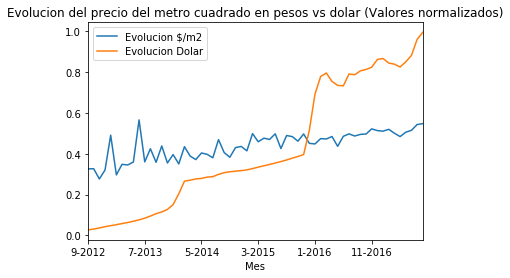

In [46]:
propertiesAndDolar.plot(x="Mes", y=["Evolucion $/m2", "Evolucion Dolar"])
plt.title('Evolucion del precio del metro cuadrado en pesos vs dolar (Valores normalizados)')

#### ¿Podemos asociar el valor del salario mínimo a los precios de las propiedades?

Normalizamos los valores del metro cuadrado y del salario, y comparamos su variación.

In [47]:
salaryEvolution = pd.read_csv('data/economic/salario-minimo.csv')

In [48]:
max_value = salaryEvolution['salario_minimo'].max()
min_value = salaryEvolution['salario_minimo'].min()
normalized = (salaryEvolution['salario_minimo'] - min_value) / (max_value - min_value)

In [49]:
salaryEvolution['normalized'] = normalized

In [50]:
salaryEvolution['mes'] = pd.to_datetime(salaryEvolution['mes'], format = "%m-%Y")
salaryEvolution['year-month'] = salaryEvolution['mes'].map(lambda x: str(x.month) + '-' + str(x.year))
salaryEvolution['year'] = salaryEvolution['mes'].map(lambda x: x.year)
salaryEvolution['month'] = salaryEvolution['mes'].map(lambda x: x.month)

In [51]:
salaryByMonth = (salaryEvolution.groupby('year-month').mean().reset_index()).sort_values(by=['year','month'])
salaryByMonth = salaryByMonth.loc[:,['year-month', 'normalized']].rename(columns={'normalized':'value'})
salaryByMonth.rename(columns={'year-month':'Mes', 'value':'Evolucion salario minimo'}, inplace=True)

In [52]:
propertiesAndSalary = pd.merge(salaryByMonth, propertiesPriceGroupedByMonth, how='inner', on='Mes')

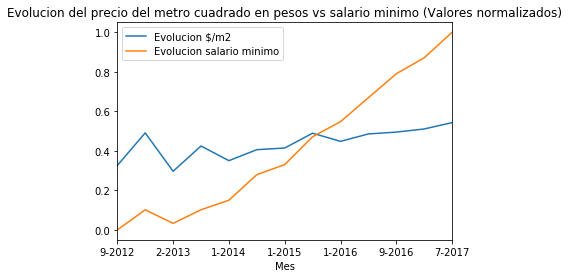

In [53]:
propertiesAndSalary.plot(x="Mes", y=["Evolucion $/m2", "Evolucion salario minimo"])
plt.title('Evolucion del precio del metro cuadrado en pesos vs salario minimo (Valores normalizados)')

#### ¿Podemos asociar la inflación a los precios de las propiedades?

In [54]:
inflationEvolution = pd.read_csv('data/economic/inflacion-argentina.csv')

In [55]:
inflationEvolution['FECHA'] = pd.to_datetime(inflationEvolution['FECHA'], format = "%d/%m/%Y")

In [56]:
inflationEvolution['year-month'] = inflationEvolution['FECHA'].map(lambda x: str(x.month) + '-' + str(x.year))
inflationEvolution['year'] = inflationEvolution['FECHA'].map(lambda x: x.year)
inflationEvolution['month'] = inflationEvolution['FECHA'].map(lambda x: x.month)

In [57]:
#Calculo variacion mes a mes de los precios del metro cuadrado
s = pd.Series([propertiesPriceGroupedByMonth.iloc[0]['Evolucion $/m2']])
s = s.append(propertiesPriceGroupedByMonth['Evolucion $/m2'])
sdf = s.reset_index()
propertiesPriceGroupedByMonth.reset_index(inplace=True)
propertiesPriceGroupedByMonth['previous'] = sdf[0]

propertiesPriceGroupedByMonth['var'] = propertiesPriceGroupedByMonth.apply(lambda x : (x['Evolucion $/m2']-x['previous'])/x['previous'], axis=1)

In [58]:
propertiesAndInflation = pd.merge(propertiesPriceGroupedByMonth, inflationEvolution, how='inner', left_on='Mes', right_on='year-month')

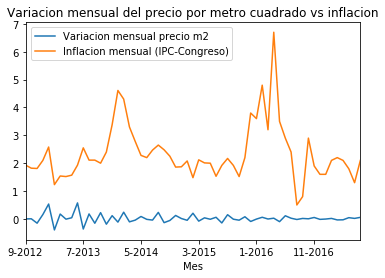

In [59]:
propertiesAndInflation.rename(columns={'var':'Variacion mensual precio m2', 'IPC-CONGRESO':'Inflacion mensual (IPC-Congreso)'}, inplace=True)
propertiesAndInflation.plot(x="Mes", y=["Variacion mensual precio m2", "Inflacion mensual (IPC-Congreso)"])
plt.title('Variacion mensual del precio por metro cuadrado vs inflacion')

### 9- Análisis por piso
- 9.1 - Análisis de relación entre precio y piso

La hipótesis de este análisis es que los primeros dos pisos de un apartamento se cotizan a precios más bajos. Esto se debe a mayor riesgo de robo al estar cerca del nivel de calle.

Adicionalmente, se espera que entre más alto el piso a partir de un cierto pico, la cotización empiece a bajar, ya que entre más alto está el departamento, más largos serán los tiempos de espera en el ascensor y escaleras.

In [ ]:
data = properties.copy()

#Selecciono datos que me interesan (estado, tipo de propiedad, superficie, precio por m2, y piso)
data2 = data[['state_name','property_type','surface_covered_in_m2','price_per_m2','floor']]

#Elimino NAs
data2.dropna(inplace=True)

#Selecciono sólo los apartamentos 
data3 = data2[data2['property_type']== 'apartment']

#Agrego una columna con el precio de la propiedad
data3['precio_propiedad'] = data3['surface_covered_in_m2']*data3['price_per_m2']

#Separo los datos en Capital Federal y Gran Buenos Aires
dataCF = data3[data3['state_name']== 'Capital Federal']
dataGBA = data3.loc[data3.state_name.str.contains('G.B.A.'),:]

In [ ]:
#Hago un scatterplot con el precio de propiedades por piso en Capital Federal

dataCF1 = dataCF[dataCF['price_per_m2']< 10000]
dataCF2 = dataCF1[dataCF1['floor']< 20]

dataCF2.plot.scatter('floor', 'price_per_m2',alpha=0.25, figsize=(12,8), color=(0.9,0.3,0.3)).set_xlabel("Piso")

In [ ]:
#Grafico el promedio de precio de propiedades por piso en Capital Federal
dataCF2.groupby('floor').mean().loc[:,'precio_propiedad'].plot(linewidth=2,figsize=(12,8),color=(0.9,0.3,0.3)).set_xlabel("Piso")

In [ ]:
#Hago un scatterplot con el precio de propiedades por piso en Gran Buenos Aires

dataGBA1 = dataGBA[dataGBA['precio_propiedad']< 1500000]
dataGBA2 = dataGBA1[dataGBA1['floor']< 30]

dataGBA2.plot.scatter('floor', 'precio_propiedad',alpha=0.25, figsize=(12,8), color=(0.3,0.5,0.9)).set_xlabel("Piso")

In [ ]:
Grafico el promedio de precio de propiedades por piso en Gran Buenos Aires
dataGBA2.groupby('floor').mean().loc[:,'precio_propiedad'].plot(linewidth=2,figsize=(12,8),color=(0.3,0.5,0.9)).set_xlabel("Piso")

Concluimos que tanto para Capital Federal como para Gran Buenos Aires, los primeros pisos se cotizan más barato.
Después de cierto punto la cotización se vuelve irregular, pero tiende a reducirse.